<img src="https://github.com/PKhosravi-CityTech/LightCnnRad/raw/main/Images/BioMindLogo.png" alt="BioMind AI Lab Logo" width="150" height="150" align="left" style="margin-bottom: 40px;"> **Repository Developed by Pegah Khosravi, Principal Investigator of the BioMind AI Lab**

Welcome to this repository! This notebook is designed to provide hands-on experience and foundational knowledge in machine learning. It is part of our journey to explore key ML concepts, algorithms, and applications. Whether you're a PhD student, or a master's student, this repository aims to support your learning goals and encourage critical thinking about machine learning systems.


# **Week 7: Bayesian Learning and Frequentist Approaches**

### In this notebook, we will cover:

- Frequentist vs. Bayesian Approaches – Key differences and real-world applications.
- Frequentist (MLE) & Bayesian (MCMC, VI) Methods – Including Gaussian Mixture Models (GMMs).
- Bayesian Parameter Estimation – Implementation in Python.
- Bayesian Regression & Classification – Using Scikit-Learn & PyMC.
- Bayesian Neural Networks (BNNs) vs. Artificial Neural Networks (ANNs) – When to use each approach.
- Hands-on Real-World Implementation – Applying all concepts in Python with real-world datasets.

# 1. Introduction to Bayesian Learning vs. Frequentist Approach

### 1.1 Frequentist Approach
The Frequentist approach defines probability as the long-term frequency of an event occurring in repeated experiments. It assumes that parameters (such as the mean or variance) are fixed but unknown. Instead of assigning probabilities to these parameters, data is collected through sampling, and statistical techniques like Maximum Likelihood Estimation (MLE) are used to estimate their values.

**Example:** If you repeatedly flip a fair coin, the probability of getting heads is estimated as the proportion of heads observed in a large number of tosses. As the number of tosses increases, the estimated probability converges to the true probability (e.g., 0.5 for a fair coin).

MLE estimates the most likely value of a parameter based on observed data. It finds the parameter 𝜃 that maximizes the likelihood function:

$\hat{\theta} = \arg\max_{\theta} P(D \mid \theta)$

where:

- $\hat{\theta}$ represents the Maximum Likelihood Estimate (MLE) of the parameter 𝜃.
- $P(D \mid \theta)$ is the likelihood function, which represents the probability of the observed data 𝐷 given the parameter 𝜃.
- "arg" stands for "argument of", meaning it specifies the value of 𝜃 that maximizes the given function.
- $\arg\max_{\theta} P(D \mid \theta)$ means we are looking for the value of 𝜃 that gives the highest likelihood.

### 1.2 Bayesian Approach
The Bayesian approach treats probability as a degree of belief. A parameter is not fixed but instead follows a probability distribution. Prior knowledge is incorporated via Bayes' Theorem:

$$ P(\theta \mid D) = \frac{P(D \mid \theta) P(\theta)}{P(D)} $$

where:

- $P(\theta)$ is the prior (belief before observing data).
- $P(D \mid \theta)$ is the likelihood (data given the parameter).
- $P(D)$ is the marginal likelihood. [Marginalizing means summing (discrete case) or integrating (continuous case) over all possible values.]
- $P(\theta \mid D)$ is the posterior (updated belief).


**Example:** Diagnosing a Disease

Imagine a doctor wants to determine whether a patient has a rare disease. Before testing, the doctor knows that only 1% of the population has the disease—this is the prior probability 𝑃(𝜃)=0.01.

Now, the patient takes a test that is 90% accurate for detecting the disease (true positive rate) but also falsely detects it 5% of the time in healthy people (false positive rate).

- If the patient has the disease:
  - The test correctly detects it 90% of the time (true positives).
  - It fails to detect it 10% of the time (false negatives).
- If the patient does not have the disease:
 - The test incorrectly gives a positive result 5% of the time (false positives).
 - It correctly gives a negative result 95% of the time (true negatives).

After a positive test result, Bayes' Theorem helps update the probability that the patient actually has the disease. Because the disease is rare, even with a positive test, the probability might still be low—showing how prior knowledge (the rarity of the disease) affects our updated belief (posterior probability).


### Bayes' Theorem Example: Rare Disease Detection

Imagine a doctor wants to determine whether a patient has a rare disease. Before testing, the doctor knows that only 1% of the population has the disease. This is the **prior probability**:

$$P(\text{Disease}) = 0.01$$

The patient takes a test that is:
- 90% accurate for detecting the disease (**true positive rate**):
  $$P(\text{Positive} \,|\, \text{Disease}) = 0.90$$
- 5% likely to wrongly detect disease in healthy people (**false positive rate**):
  $$P(\text{Positive} \,|\, \text{No Disease}) = 0.05$$

We want to calculate the **posterior probability**: the probability that the patient actually has the disease given a positive test result:

$$P(\text{Disease} \,|\, \text{Positive})$$

Using **Bayes' Theorem**:

$$
P(\text{Disease} \,|\, \text{Positive}) = \frac{P(\text{Positive} \,|\, \text{Disease}) \cdot P(\text{Disease})}{P(\text{Positive})}
$$

First, calculate the total probability of a positive test:

$$
P(\text{Positive}) = P(\text{Positive} \,|\, \text{Disease}) \cdot P(\text{Disease}) + P(\text{Positive} \,|\, \text{No Disease}) \cdot P(\text{No Disease})
$$

$$
P(\text{Positive}) = (0.90)(0.01) + (0.05)(0.99) = 0.009 + 0.0495 = 0.0585
$$

Now apply Bayes’ Theorem:

$$
P(\text{Disease} \,|\, \text{Positive}) = \frac{0.90 \cdot 0.01}{0.0585} = \frac{0.009}{0.0585} \approx 0.1538
$$

### Final Answer:
The **posterior probability** that the patient has the disease given a positive test result is approximately **15.4%**.

Even though the test is fairly accurate, the **rarity of the disease** keeps the posterior probability relatively low. This demonstrates the importance of considering **prior probabilities** when interpreting test results.


### 1.3 Frequentist vs. Bayesian: Key Differences

| Aspect               | Frequentist Approach    | Bayesian Approach           |
|----------------------|------------------------|-----------------------------|
| **Probability Interpretation** | Defined as the long-run frequency of an event occurring in repeated trials. | Represents a degree of belief that updates with new evidence. |
| **Parameters**       | Assumed to be fixed but unknown. Estimates are based on sample data. | Treated as random variables with probability distributions. |
| **Inference**       | Based only on the observed data and likelihood function. | Incorporates both prior knowledge and observed data using Bayes' Theorem. |
| **Intervals**       | Confidence Intervals: Range where the parameter is expected to lie in repeated experiments. | Credible Intervals: Probability that the parameter lies within a given range, given the observed data. |


## 2. Hands-on Python Implementation
We will implement MLE (Frequentist) and Bayesian Parameter Estimation.

### 2.1 Frequentist Approach: Maximum Likelihood Estimation (MLE)
Let's estimate a coin bias ($\theta$) using MLE.

This code is designed to demonstrate Maximum Likelihood Estimation (MLE) in action through a real-world example of coin flips. It provides both a hands-on numerical simulation and a visualization to help you understand how MLE works in practice.

By running this code, you'll see how MLE estimates the most likely value of a parameter based on observed data. While MLE is often introduced in mathematical form, this implementation bridges the gap between theory and practice—allowing you to see likelihood maximization visually and intuitively.

MLE Estimate of θ: 0.630


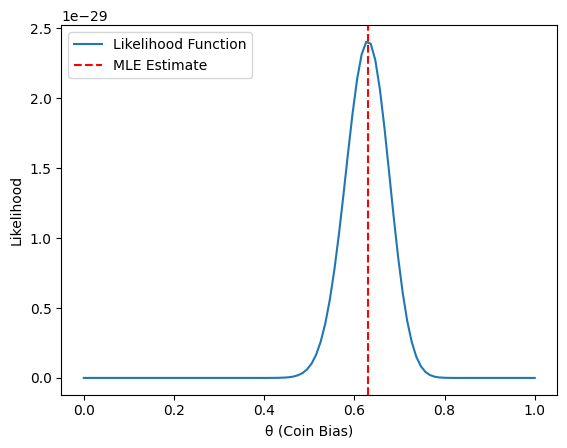

In [ ]:
import numpy as np  # Import NumPy for numerical operations
import matplotlib.pyplot as plt  # Import Matplotlib for plotting
from scipy.stats import binom  # Import binomial distribution from SciPy

# Set random seed for reproducibility
np.random.seed(42)

# Simulate 100 coin flips: 1 = Heads, 0 = Tails
# True coin bias (probability of heads) is set to 0.6
data = np.random.binomial(n=1, p=0.6, size=100)

# MLE Estimate: The maximum likelihood estimate (MLE) for Bernoulli distribution is the sample mean
theta_mle = np.mean(data)  # Count heads (1s) and divide by total flips
print(f"MLE Estimate of θ: {theta_mle:.3f}")  # Print MLE estimate rounded to 3 decimal places

# Define a range of possible θ (coin bias) values from 0 to 1
theta_vals = np.linspace(0, 1, 100)

# Compute the likelihood for each θ value
# Likelihood = Product of Bernoulli probabilities given observed data
likelihoods = [np.prod(binom.pmf(data, 1, p)) for p in theta_vals]

# Plot the likelihood function for different values of θ
plt.plot(theta_vals, likelihoods, label="Likelihood Function")

# Mark the MLE estimate on the plot with a vertical dashed red line
plt.axvline(theta_mle, color='r', linestyle="--", label="MLE Estimate")

# Label the axes and add legend
plt.xlabel("θ (Coin Bias)")  # X-axis label: Possible bias values
plt.ylabel("Likelihood")  # Y-axis label: Likelihood values
plt.legend()  # Display legend

# Show the plot
plt.show()


Explanation of Key Concepts:
- Simulating Coin Flips: We generate 100 flips of a biased coin (60% chance of heads).
- MLE Estimation: The maximum likelihood estimate for a Bernoulli distribution is simply the proportion of heads in the observed data.
- Likelihood Function Plot: We calculate the likelihood for different values of 𝜃 and visualize how the likelihood varies. The peak of this function represents the MLE.

### 2.2 Bayesian Parameter Estimation

Now, let’s estimate the coin bias (𝜃) using a Bayesian approach.

This code demonstrates how Bayesian inference updates our belief about the coin’s bias after observing data. Instead of treating 𝜃 as a fixed value (like in MLE), we assume a prior distribution and update it using observed coin flips to get a posterior distribution.

By running this code, you will see how prior knowledge (before observing data) is combined with evidence (observed flips) to refine our belief about 𝜃. The visualization helps compare the prior and posterior distributions, making Bayesian updating more intuitive.



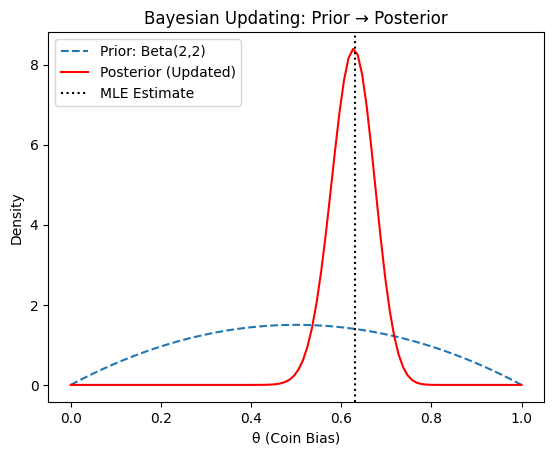

Posterior Mean (Bayesian Estimate): 0.625


In [ ]:
import scipy.stats as stats  # Import SciPy's stats module for probability distributions

# **Step 1: Define the Prior Distribution**
# We assume a Beta(2,2) prior, which represents a belief that the coin is roughly fair (θ ≈ 0.5)
alpha_prior, beta_prior = 2, 2

# **Step 2: Update the Prior with Observed Data (Bayesian Inference)**
# Count the number of heads and tails from the simulated coin flips
heads = np.sum(data)  # Sum of ones in 'data' gives the number of heads
tails = len(data) - heads  # Remaining flips are tails

# Compute the Posterior parameters using the Beta-Binomial update rule
alpha_post = alpha_prior + heads  # Update alpha with observed heads
beta_post = beta_prior + tails  # Update beta with observed tails

# **Step 3: Define θ values for plotting the distributions**
theta_range = np.linspace(0, 1, 100)  # Possible values of θ from 0 to 1

# Compute the probability density functions (PDFs) for Prior and Posterior
prior_dist = stats.beta.pdf(theta_range, alpha_prior, beta_prior)  # Prior distribution
posterior_dist = stats.beta.pdf(theta_range, alpha_post, beta_post)  # Posterior distribution

# **Step 4: Plot the Prior and Posterior Distributions**
plt.plot(theta_range, prior_dist, label="Prior: Beta(2,2)", linestyle="--")  # Prior in dashed line
plt.plot(theta_range, posterior_dist, label="Posterior (Updated)", color="red")  # Posterior in red

# Mark the MLE estimate on the plot
plt.axvline(theta_mle, color='black', linestyle=":", label="MLE Estimate")  # MLE as dotted line

# Labels and Title
plt.xlabel("θ (Coin Bias)")  # X-axis label
plt.ylabel("Density")  # Y-axis label
plt.legend()  # Show the legend
plt.title("Bayesian Updating: Prior → Posterior")  # Title of the plot

# Show the plot
plt.show()

# **Step 5: Compute and Print the Posterior Mean (Bayesian Estimate)**
# The posterior mean is given by (α / (α + β)), which is the expected value of the Beta distribution
print(f"Posterior Mean (Bayesian Estimate): {alpha_post / (alpha_post + beta_post):.3f}")

### Explanation of Key Concepts:

#### **Prior Distribution:**
- We assume a $\text{Beta}(2,2)$ prior, meaning before observing data, we believe the coin is roughly fair.
- The Beta distribution is commonly used as a prior for probabilities because it is conjugate to the Binomial likelihood.

#### **Bayesian Updating:**
- The Beta distribution parameters are updated with the observed number of heads and tails.
- New parameters:
  $$ \alpha_{\text{posterior}} = \alpha_{\text{prior}} + \text{heads} $$
  $$ \beta_{\text{posterior}} = \beta_{\text{prior}} + \text{tails} $$
- This results in a new posterior belief about $\theta$ (coin bias).

#### **Visualization:**
- The **prior** (before observing data) is plotted as a dashed line.
- The **posterior** (after updating with data) is plotted in red.
- The **MLE estimate** is marked as a reference.

#### **Posterior Mean:**
- The Bayesian estimate of $\theta$ is the mean of the posterior Beta distribution, calculated as:
  $$ \mathbb{E}[\theta] = \frac{\alpha_{\text{posterior}}}{\alpha_{\text{posterior}} + \beta_{\text{posterior}}} $$
- This value is printed as the final Bayesian estimate of the coin's bias.

### Understanding Bernoulli and Binomial Distributions

- The **Bernoulli distribution** models the outcome of a single coin flip with probability $p$ of heads.
- The **Binomial distribution** models the number of heads in $n$ independent Bernoulli trials.
- When $n = 1$, the Binomial distribution simplifies to the Bernoulli distribution.

In this simulation, we generate 100 independent coin flips using:

```python
import numpy as np
np.random.binomial(n=1, p=0.6, size=100)
```

Each flip follows a Bernoulli distribution with $p = 0.6$, meaning there is a 60% chance of landing heads.

The Maximum Likelihood Estimation (MLE) for $p$ in this case is simply the sample mean of the outcomes, representing the proportion of heads observed in the simulated flips.



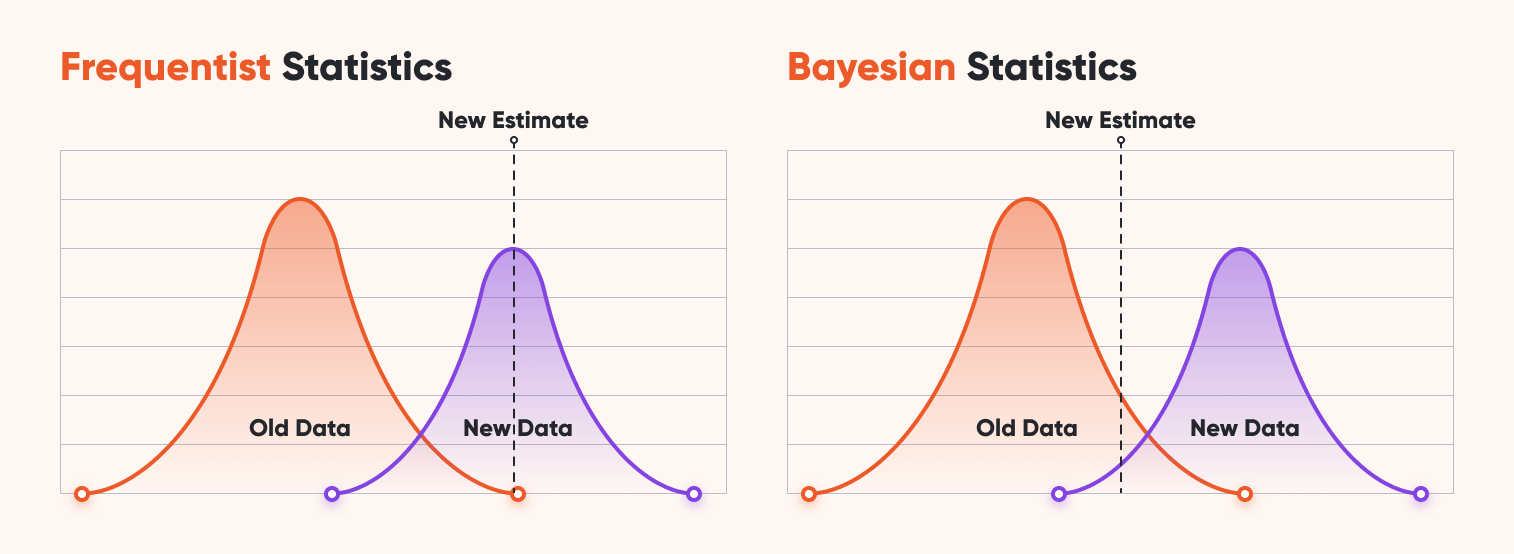

Ref: https://www.optimonk.com/mastering-bayesian-a-b-testing/

The left plot represents the Frequentist approach:

- It treats new data independently, without incorporating prior information.
- The estimate is based solely on the new data, discarding the old data.
- The new estimate (dashed line) is centered around the new data distribution.

The right plot represents the Bayesian approach:

- It combines prior information (old data) with new data to update beliefs.
- The resulting estimate is a blend of both, leading to a smoother transition.
- The new estimate (dashed line) shifts gradually instead of jumping completely to the new data.

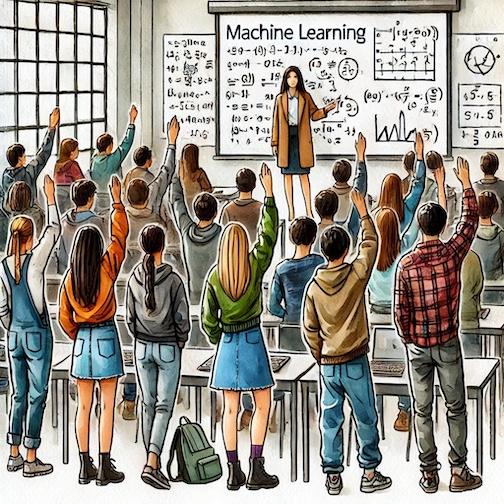

## Student Q&A: Clarifying Frequentist and Bayesian Concepts

### 1. Can Bayesian methods be used for both regression and classification?
**Yes!** Bayesian methods apply to both regression and classification problems.

#### **Bayesian Regression:**
- Example: Bayesian Linear Regression, where we place priors on the regression coefficients and update them with observed data.
- The model provides predictive distributions, not just point estimates, allowing us to quantify uncertainty.

#### **Bayesian Classification:**
- Example: Naïve Bayes Classifier is a classic Bayesian model used for classification.
- More advanced Bayesian models (e.g., Bayesian Neural Networks) can also be used for classification.

**Key advantage:** Bayesian methods give probability distributions over predictions, making them great for handling uncertainty and small datasets.



### 2. Can Frequentist methods be used for both regression and classification?
**Yes!** Frequentist methods are also used for both regression and classification.

#### **Frequentist Regression:**
- Example: Ordinary Least Squares (OLS) regression
- Uses point estimates (e.g., Maximum Likelihood Estimation, MLE) rather than probability distributions over parameters.

#### **Frequentist Classification:**
- Example: Logistic Regression (which is actually a classification method!)
- Also includes SVMs (Support Vector Machines), Decision Trees, and Neural Networks, which are all frequentist models.

**Key difference:** Unlike Bayesian methods, Frequentist approaches do not provide uncertainty quantification in the same way (e.g., no probability distributions over parameters).



### 3. Are Bayesian and Frequentist methods supervised or unsupervised?
Both Bayesian and Frequentist approaches are general statistical frameworks, so they can be used for both supervised and unsupervised learning:

**Supervised Learning (Regression & Classification)**
- Both Bayesian and Frequentist models are commonly used in supervised learning.
- Example (Frequentist): Linear Regression, Logistic Regression
- Example (Bayesian): Bayesian Linear Regression, Naïve Bayes

**Unsupervised Learning**
- Bayesian methods are particularly useful for unsupervised learning models like clustering and density estimation.
- Example: Gaussian Mixture Models (GMMs) use Bayesian inference to determine cluster membership.
- Frequentist unsupervised methods include K-Means clustering, PCA, and DBSCAN.


### 4. Evolving Perspectives: Uncertainty in Frequentist vs. Bayesian Models

Historically, the distinction between Frequentist and Bayesian approaches was drawn with rigid lines—Frequentists were said to reject uncertainty over parameters, while Bayesians embraced it through probability distributions. However, modern statistical practice has become more integrated and pragmatic.

While Bayesian methods naturally encode uncertainty in model parameters via posterior distributions, Frequentist approaches also provide tools for uncertainty estimation—such as confidence intervals, bootstrapping, and hypothesis testing. These are grounded in repeated-sample theory rather than prior beliefs but still reflect a form of statistical uncertainty.

The key distinction lies not in whether uncertainty can be quantified—but in how it is conceptualized and computed.

As machine learning and data science have matured, the conversation has shifted from “which paradigm is correct?” to “which approach is more useful in a given context?” This notebook reflects that evolution, encouraging students to appreciate the strengths and limitations of both philosophies—and to adopt the one most appropriate for their problem, data, and computational resources.

## Gaussian Mixture Models (GMMs) in Bayesian Machine Learning

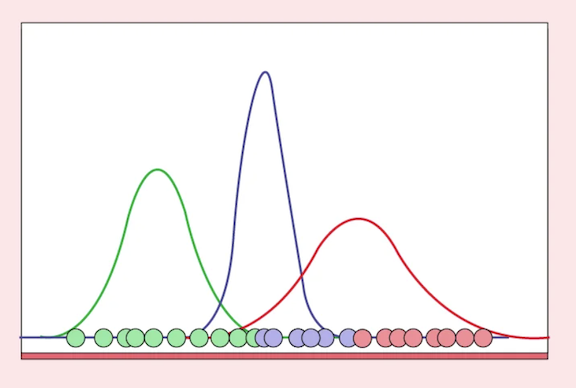

Ref: https://www.appliedaicourse.com/blog/gaussian-mixture-model-in-machine-learning/

### Introduction

**Gaussian Mixture Models (GMMs)** are a probabilistic model that assumes data is generated from a mixture of several Gaussian distributions with unknown parameters. Each data point is assumed to belong to one of these distributions, making GMMs particularly useful for clustering and density estimation.

Unlike K-Means, which assigns hard cluster labels, GMMs assign soft probabilities (i.e., each point has a probability of belonging to each cluster). This makes GMMs suitable for cases where clusters overlap.

GMMs are commonly solved using the Expectation-Maximization (EM) algorithm, which iteratively estimates:

- **Expectation (E-step):** Compute the probability of each point belonging to each Gaussian.
- **Maximization (M-step):** Update Gaussian parameters (mean, covariance, weight).

In **Bayesian Gaussian Mixture Models (BGMMs)**, we introduce a prior distribution over the parameters to regularize and prevent overfitting.


### Key Concepts of GMMs

- **Mixture Model:** A probabilistic model representing a distribution as a combination of multiple Gaussian distributions.
- **Expectation-Maximization (EM) Algorithm:** Used to iteratively estimate parameters of the model.
- **Soft Clustering:** Unlike K-Means, where each point belongs to a single cluster, GMMs assign probabilities.

#### Covariance Types:
- **full**: Each Gaussian has its own covariance matrix.
- **tied**: A single covariance matrix is shared.
- **diag**: Each Gaussian has its own diagonal covariance matrix.
- **spherical**: Each Gaussian has its own variance.


### Implementation of GMMs Using `scikit-learn`

We will use the **Iris dataset** from `scikit-learn` to apply GMMs.

The probability density function (PDF) of a multivariate Gaussian distribution is given by:

$$
p(x) = \frac{1}{(2\pi)^{\frac{d}{2}} |\Sigma|^{\frac{1}{2}}} \exp \left(-\frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu) \right)
$$

where:
- $x$ is the data point,
- $\mu$ is the mean vector,
- $\Sigma$ is the covariance matrix,
- $d$ is the dimensionality of the data.

In GMMs, we model the data as a weighted sum of K Gaussians:

$$
p(x) = \sum_{k=1}^{K} \pi_k \frac{1}{(2\pi)^{d/2} |\Sigma_k|^{1/2}} \exp \left(-\frac{1}{2} (x - \mu_k)^T \Sigma_k^{-1} (x - \mu_k) \right)
$$

where:
- $\pi_k$ are the mixture weights such that $\sum_{k} \pi_k = 1$,
- The Gaussian component is explicitly written as:

$$
\frac{1}{(2\pi)^{d/2} |\Sigma_k|^{1/2}} \exp \left(-\frac{1}{2} (x - \mu_k)^T \Sigma_k^{-1} (x - \mu_k) \right)
$$






## **Implementing Gaussian Mixture Models (GMMs) on the Iris Dataset**

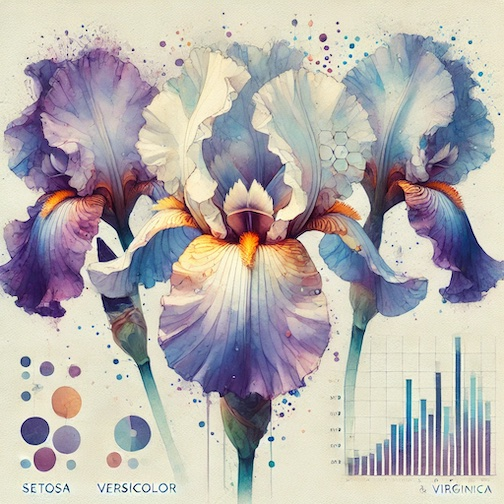

In this notebook, we apply **Gaussian Mixture Models (GMMs)** and **Bayesian Gaussian Mixture Models (BGMMs)** to the **Iris dataset** to explore probabilistic clustering techniques. Unlike K-Means, which assigns each data point to a single cluster, GMMs assign probabilities, allowing for soft clustering.


### **Step-by-Step Explanation of the Code**
### 🔹 Step 1: Load the Iris Dataset
The Iris dataset is a well-known dataset in machine learning, consisting of **150 samples** from three species of iris flowers (Setosa, Versicolor, and Virginica), each described by four features:
- Sepal length
- Sepal width
- Petal length
- Petal width

We extract:
- **`X`** → The feature matrix (4 features per sample)
- **`y_true`** → The true species labels for evaluation


### 🔹 Step 2: Standardizing the Data
Since clustering algorithms are sensitive to scale differences, we apply standardization using `StandardScaler()`, which transforms each feature to have zero mean and unit variance.


### 🔹 Step 3: Adding Small Noise to Prevent Degenerate Covariance Matrices
To avoid numerical issues where the covariance matrix becomes singular (which can cause the GMM to fail to converge), we add a small amount of Gaussian noise to stabilize the computations.


### 🔹 Step 4: Dimensionality Reduction Using PCA
Since the Iris dataset has four dimensions, we use Principal Component Analysis (PCA) to reduce the data to two dimensions for:
- Better visualization of clusters
- Faster model convergence (reducing computational complexity)


### 🔹 Step 5: Fitting a Gaussian Mixture Model (GMM)
We initialize and fit a GMM with 3 components, since we expect three natural clusters (corresponding to the three Iris species).  
To ensure better convergence, we:
- Set `max_iter=1000` to allow more iterations for the EM algorithm.
- Use `reg_covar=1e-6` to regularize the covariance matrix.
- Initialize with `kmeans` to provide a good starting point.

After fitting, the GMM models the dataset as a mixture of 3 Gaussian distributions.


### 🔹 Step 6: Predicting Cluster Assignments
After training, we predict cluster labels using the trained GMM, assigning each point to the Gaussian component with the highest probability.


### 🔹 Step 7: Getting Soft Probability Assignments
Instead of hard clustering (where each point belongs to one cluster), GMM provides probabilities of a data point belonging to each of the three clusters.


### 🔹 Step 8: Visualizing GMM Clusters
To interpret results, we:
- Plot the PCA-reduced data on a 2D scatter plot.
- Color points according to their assigned cluster from the GMM.


### 🔹 Step 9: Evaluating GMM Performance
We use two key metrics:
1. Adjusted Rand Index (ARI) → Compares the predicted clusters with the true labels.  
   - Range: -1 to 1, where 1 indicates perfect clustering.
2. Bayesian Information Criterion (BIC) → Evaluates model complexity.  
   - Lower BIC values indicate better models (balancing fit and simplicity).

### 🔹 Step 10: Implementing Bayesian Gaussian Mixture Model (BGMM)
Unlike standard GMMs, BGMM does not require us to specify the number of clusters beforehand.  
It automatically determines an appropriate number using a Dirichlet Process, allowing for flexible, non-fixed clustering.

- We fit a Bayesian GMM with up to 10 components, letting it decide the optimal number.



### 🔹 Step 11: Visualizing Bayesian GMM Clusters
Finally, we visualize the Bayesian GMM clustering results using the same PCA-reduced data.


### **Key Takeaways**
✔ GMMs use probabilistic clustering, making them more flexible than K-Means.

✔ Soft clustering assigns probabilities instead of hard labels.  

✔ PCA helps visualize high-dimensional clustering results.

✔ BIC helps choose the best model complexity.

✔ Bayesian GMM automatically determines the optimal number of clusters.


This implementation demonstrates how probabilistic clustering can reveal hidden structure in data!


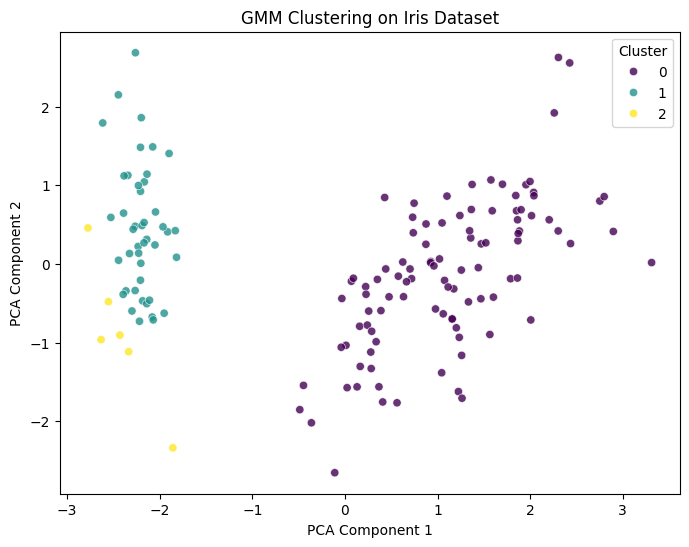

Adjusted Rand Index (ARI) for GMM: 0.515
Bayesian Information Criterion (BIC): 844.74


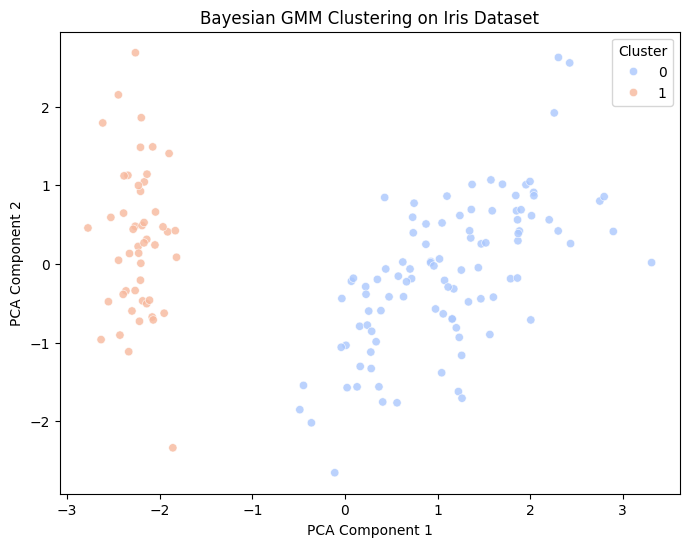

Adjusted Rand Index (ARI) for BGMM: 0.568
BGMM effectively used 2 clusters.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score

# Step 1: Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Features
y_true = iris.target  # True labels of the species

# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Add small noise to prevent degenerate cases
X_scaled += np.random.normal(0, 1e-4, X_scaled.shape)

# Step 4: Reduce dimensions using PCA for better stability
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 5: Fit a Gaussian Mixture Model (GMM) with fixes for convergence
gmm = GaussianMixture(n_components=3, covariance_type='full', max_iter=1000, tol=1e-4, reg_covar=1e-6, init_params='kmeans', random_state=42)
gmm.fit(X_pca)

# Step 6: Predict cluster assignments
y_gmm = gmm.predict(X_pca)

# Step 7: Get soft probability assignments
probabilities = gmm.predict_proba(X_pca)

# Step 8: Visualizing Clusters using PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_gmm, palette='viridis', alpha=0.8)
plt.title("GMM Clustering on Iris Dataset")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

# Step 9: Evaluate GMM Performance
ari_score = adjusted_rand_score(y_true, y_gmm)
print(f"Adjusted Rand Index (ARI) for GMM: {ari_score:.3f}")

bic_score = gmm.bic(X_pca)
print(f"Bayesian Information Criterion (BIC): {bic_score:.2f}")

# Step 10: Implementing Bayesian Gaussian Mixture Model
bayesian_gmm = BayesianGaussianMixture(n_components=10, covariance_type='full', weight_concentration_prior=1e-3, max_iter=1000, random_state=42)
bayesian_gmm.fit(X_pca)

# Predict cluster labels from Bayesian GMM
bayesian_labels = bayesian_gmm.predict(X_pca)

# Step 11: Visualizing Bayesian GMM Clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=bayesian_labels, palette='coolwarm', alpha=0.8)
plt.title("Bayesian GMM Clustering on Iris Dataset")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

ari_bgmm = adjusted_rand_score(y_true, bayesian_labels)
print(f"Adjusted Rand Index (ARI) for BGMM: {ari_bgmm:.3f}")

# Step 12: Understanding BGMM's Effective Number of Clusters
effective_components = np.sum(bayesian_gmm.weights_ > 1e-2)  # Count components with significant weight
print(f"BGMM effectively used {effective_components} clusters.")



The Gaussian Mixture Model (GMM) achieved an Adjusted Rand Index (ARI) of 0.515, indicating a moderate alignment between its unsupervised clustering and the true Iris labels. This suggests the model captured some class structure, but not perfectly. The Bayesian Information Criterion (BIC) for the GMM was 844.74, pointing to a reasonably balanced model in terms of fit and complexity, though there may still be room for tuning.

In comparison, the Bayesian Gaussian Mixture Model (BGMM) performed slightly better, with an ARI of 0.568, suggesting improved clustering quality. Interestingly, the BGMM automatically reduced the number of effective clusters to 2, highlighting its preference for simpler models by pruning less significant components. This may indicate that some Iris classes are not well separated in the reduced PCA space, or that the BGMM is over-regularizing due to the strong prior. Overall, the results show that while GMM and BGMM can uncover structure in the data, their effectiveness depends on initialization, priors, and dimensionality reduction choices.

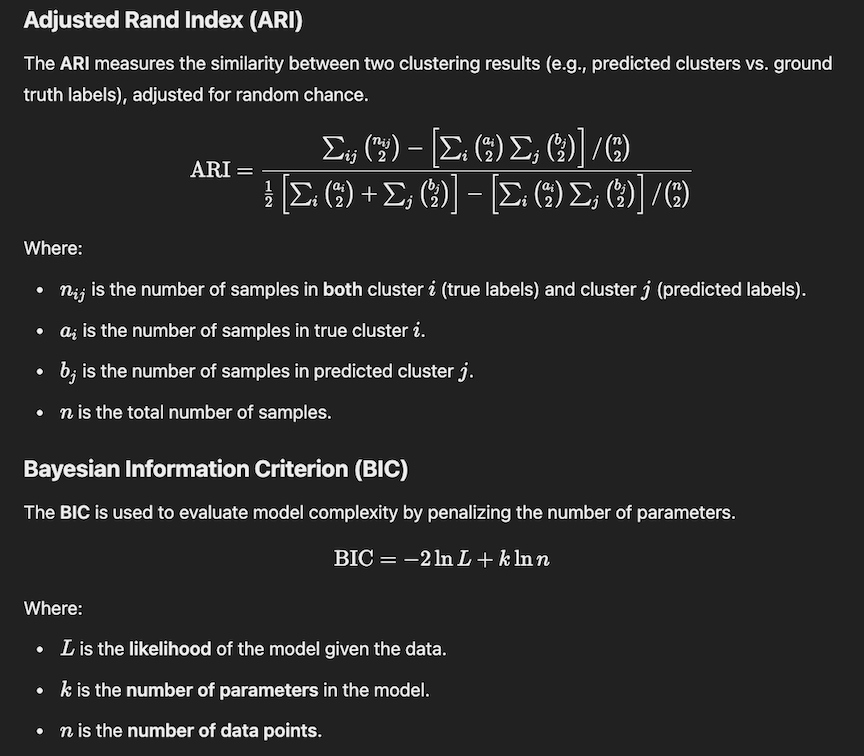

Why is the Bayesian Information Criterion (BIC) commonly used for Gaussian Mixture Models (GMMs) but not for Bayesian Gaussian Mixture Models (BGMMs)?

The key reason lies in how these models estimate parameters and handle model complexity. GMMs rely on maximum likelihood estimation, making BIC a suitable tool for balancing model fit and complexity to choose the optimal number of components. In contrast, BGMMs incorporate prior distributions into the model and typically use variational inference rather than maximum likelihood. This Bayesian framework makes BIC inapplicable because the underlying assumptions of BIC—particularly the use of non-informative priors and tractable likelihoods—are not valid in BGMMs. Moreover, BGMMs can automatically determine the number of effective components through their prior structure, reducing the need for external model selection criteria like BIC.

# Naïve Bayes Classifier: Theory & Implementation

## 1. Introduction to Naïve Bayes
Naïve Bayes is a probabilistic classification algorithm based on Bayes' Theorem. It assumes that the features are conditionally independent given the class label, which is why it is called "naïve."

### Bayes' Theorem:
$$
P(Y | X) = \frac{P(X | Y) P(Y)}{P(X)}
$$
where:
- $ P(Y | X) $ is the posterior probability of class $ Y $ given features $ X $
- $ P(X | Y) $ is the likelihood of $ X $ given class $ Y $
- $ P(Y) $ is the prior probability of class $ Y $
- $ P(X) $ is the evidence (normalizing factor)

### Why is it called "Naïve"?
The algorithm assumes that all features are **independent** given the class label. In reality, this assumption is often violated (features in real-world data are usually correlated). However, despite this simplification, Naïve Bayes performs well in many applications.

### Advantages:
- Works well with small datasets
- Fast training and inference
- Handles high-dimensional data effectively
- Performs well in text classification and spam filtering

### Disadvantages:
- Strong independence assumption may not always hold
- Less flexible compared to other classifiers like Decision Trees or Neural Networks

## 2. Types of Naïve Bayes Classifiers
- **Gaussian Naïve Bayes** (For continuous data, assumes normal distribution)
- **Multinomial Naïve Bayes** (For text classification, works with word frequencies)
- **Bernoulli Naïve Bayes** (For binary feature data, e.g., presence or absence of words)

## 3. Implementation in Python

In [ ]:
### Import Required Libraries
import numpy as np  # For numerical computations
import pandas as pd  # For handling structured data (not used in this snippet but useful for real datasets)
import matplotlib.pyplot as plt  # For visualization (optional)
from sklearn.model_selection import train_test_split  # For splitting dataset into training and testing sets
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB  # Import different Naïve Bayes classifiers
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Evaluation metrics
from sklearn.feature_extraction.text import CountVectorizer  # Converts text data into numerical feature vectors


### 3.1 Gaussian Naïve Bayes (For Continuous Data)
#### Load a Dataset (Iris Dataset Example)

from sklearn.datasets import load_iris  # Import Iris dataset

# Load dataset into X (features) and y (labels)
iris = load_iris()
X, y = iris.data, iris.target  # X contains flower measurements, y contains species labels (0, 1, 2)

# Split dataset into 70% training and 30% testing, stratifying ensures balanced class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize and train the Gaussian Naïve Bayes model (used for continuous features)
gnb = GaussianNB()
gnb.fit(X_train, y_train)  # Train the model on the training data

# Make predictions on the test data
y_pred = gnb.predict(X_test)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))  # Prints the model accuracy
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1))  # Detailed performance metrics


### 3.2 Multinomial Naïve Bayes (For Text Classification)
#### Load and Process Text Data

# Expanded sample text dataset (more examples for better class distribution)
texts = [
    "Free money now!", "Buy cheap meds online", "Meeting at 10 AM", "Win lottery now",
    "Project deadline tomorrow", "Urgent: Claim your free gift!", "Conference call at 2 PM",
    "Get rich quick!", "Your invoice is overdue", "Congratulations! You won a prize!",
    "Can we schedule a meeting?", "Don't miss this limited offer!", "Our session is rescheduled",
    "Exclusive discount for you", "Lunch at 1 PM?", "Special promo just for you!",
    "Please review the attached document", "This is your last chance!"
]

labels = [1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]  # 1 = Spam, 0 = Not Spam

# Convert text data into numerical feature vectors using CountVectorizer
vectorizer = CountVectorizer()  # This converts words into numerical counts (Bag-of-Words model)
X_text = vectorizer.fit_transform(texts)  # Transform the text dataset

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_text, labels, test_size=0.3, random_state=42, stratify=labels)

# Initialize and train the Multinomial Naïve Bayes model (works well for text data)
mnb = MultinomialNB()
mnb.fit(X_train, y_train)  # Train model

# Make predictions
y_pred = mnb.predict(X_test)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))  # Print model accuracy
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1))  # Print detailed performance


### 3.3 Bernoulli Naïve Bayes (For Binary Features)

# Convert text data into binary format (presence or absence of words instead of counts)
X_text_binary = (X_text > 0).astype(int)  # Convert word counts into binary presence (0 = absent, 1 = present)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_text_binary, labels, test_size=0.3, random_state=42, stratify=labels)

# Initialize and train the Bernoulli Naïve Bayes model (used for binary data)
bnb = BernoulliNB()
bnb.fit(X_train, y_train)  # Train the model

# Make predictions
y_pred = bnb.predict(X_test)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))  # Print accuracy
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1))  # Print detailed report


Accuracy: 0.9111111111111111

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.82      0.93      0.88        15
           2       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45

Accuracy: 0.6666666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      0.33      0.50         3

    accuracy                           0.67         6
   macro avg       0.80      0.67      0.62         6
weighted avg       0.80      0.67      0.62         6

Accuracy: 0.6666666666666666

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.

**Gaussian Naïve Bayes (Continuous Data - Iris Dataset)**

- Load the dataset using load_iris().
- Split it into training (70%) and testing (30%) sets while ensuring class balance (stratify=y).
- Train the model using GaussianNB().fit(X_train, y_train).
- Predict on test data using .predict(X_test).
- Evaluate accuracy & classification report using accuracy_score() & classification_report().

**Multinomial Naïve Bayes (Text Classification)**

- Prepare a small dataset of text messages (spam & non-spam).
- Convert text into numerical feature vectors using CountVectorizer().
- Split the dataset into training and testing sets.
- Train a Multinomial Naïve Bayes model, which is best suited for text classification.
- Predict labels & evaluate performance using classification_report().

**Bernoulli Naïve Bayes (Binary Features)**

- Convert text data to binary representation (0 = absent, 1 = present).
- Split dataset to ensure a balanced test set.
- Train BernoulliNB() model, suitable for binary feature classification.
- Predict and evaluate using accuracy and a classification report.

## Can we apply all three Naïve Bayes models to the same dataset?
**Yes!** Here’s the Python code to apply Gaussian Naïve Bayes, Multinomial Naïve Bayes, and Bernoulli Naïve Bayes on the Iris dataset and compare their performance.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, Binarizer
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Normalize the data (since MultinomialNB and BernoulliNB require non-negative inputs)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convert features into binary format for BernoulliNB (presence or absence)
binarizer = Binarizer(threshold=0.5)
X_binary = binarizer.fit_transform(X_scaled)

# Split dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
X_train_bin, X_test_bin, _, _ = train_test_split(X_binary, y, test_size=0.3, random_state=42, stratify=y)

# Initialize the models
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

# Train the models
gnb.fit(X_train, y_train)
mnb.fit(X_train, y_train)
bnb.fit(X_train_bin, y_train)

# Make predictions
y_pred_gnb = gnb.predict(X_test)
y_pred_mnb = mnb.predict(X_test)
y_pred_bnb = bnb.predict(X_test_bin)

# Evaluate the models
models = ['GaussianNB', 'MultinomialNB', 'BernoulliNB']
accuracies = [
    accuracy_score(y_test, y_pred_gnb),
    accuracy_score(y_test, y_pred_mnb),
    accuracy_score(y_test, y_pred_bnb),
]

# Display performance comparison
results = pd.DataFrame({'Model': models, 'Accuracy': accuracies})
print(results)

# Print classification reports
print("\nGaussianNB Classification Report:\n", classification_report(y_test, y_pred_gnb))
print("\nMultinomialNB Classification Report:\n", classification_report(y_test, y_pred_mnb))
print("\nBernoulliNB Classification Report:\n", classification_report(y_test, y_pred_bnb))

           Model  Accuracy
0     GaussianNB  0.911111
1  MultinomialNB  0.822222
2    BernoulliNB  0.688889

GaussianNB Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.82      0.93      0.88        15
           2       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45


MultinomialNB Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.73      0.73      0.73        15
           2       0.73      0.73      0.73        15

    accuracy                           0.82        45
   macro avg       0.82      0.82      0.82        45
weighted avg       0.82      0.82      0.82        45


BernoulliNB Classification Report:
               prec

**Explanation:**
- GaussianNB: Directly applied to the dataset as it works well with continuous numerical data.
- MultinomialNB: Requires non-negative values, so we scale the features using MinMaxScaler to normalize them between 0 and 1.
- BernoulliNB: Works with binary features (0s and 1s), so we binarize the dataset using Binarizer to convert values into presence/absence indicators. Binarization doesn't reduce the number of classes — it just transforms the shape of the input data. The model is still learning to predict which species the input belongs to — using binary-valued features.

By applying appropriate feature transformations, we can run all three models on the same dataset (Iris) and evaluate their performance under different assumptions.

## 4. Conclusion
Naïve Bayes classifiers are powerful, simple, and computationally efficient for many tasks, especially text classification. Despite the strong independence assumption, they work surprisingly well in practice. They are widely used in spam filtering, sentiment analysis, medical diagnosis, and document classification. Try experimenting with different datasets and tuning hyperparameters to improve performance!

## **🎲 The Gambler’s Discovery: A Fictional Tale of Monte Carlo & Markov**

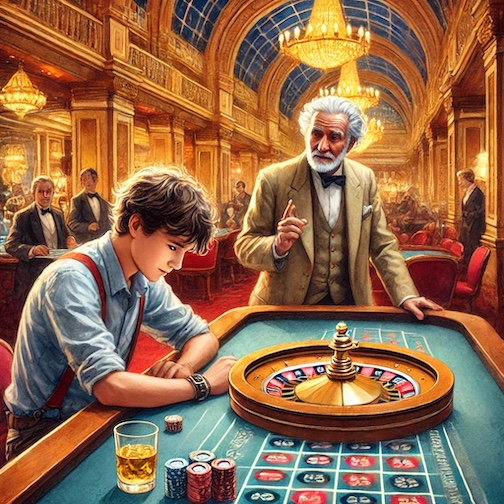


In the lavish Monte Carlo Casino, a young mathematics student named Mark sat at the roulette table, mesmerized by the spinning wheel. His mind raced:

"Is there a way to predict the outcome? Is it truly random, or can I find a pattern?"

As he pondered, an elderly professor, sipping his drink at the bar, observed Mark’s frustration.

"Young man," the professor said, "let me tell you a secret about probabilities. Your next move depends only on the present state, not on how much you've lost before. That’s what we call a **Markov Chain**."

Intrigued, Mark listened as the professor explained:

- A Markov Chain describes a process where each step depends only on the current state, not past history.
- Casino games are full of randomness, just like real-world probability models.
- Instead of trying to find an exact formula, you could run thousands of simulations to estimate outcomes!

Mark's eyes lit up. What if he could predict the game using random sampling? Instead of solving complex equations, he’d run thousands of random simulations and estimate his chances.

By the end of the night, Mark didn’t leave as a millionaire—but he left with an idea that would change the world.

He had unknowingly invented the **Monte Carlo** Method.

### 🔬 The Real Story: Monte Carlo, Markov, and the Manhattan Project

While the story of Mark, the gambler, and the professor is fictional, it reflects real historical discoveries made by brilliant mathematicians and scientists.

1️⃣ What is the Monte Carlo Method?

- The Monte Carlo Method was developed in the 1940s by Stanislaw Ulam, a mathematician working on the Manhattan Project, a secret U.S. initiative to develop the atomic bomb.
- He was trying to model neutron behavior in nuclear fission and realized that random sampling—simulating thousands of possibilities—could estimate complex probabilities without exact calculations.
- His colleague, Nicholas Metropolis, named it the "Monte Carlo Method" as a nod to the famous Monte Carlo Casino, where luck and randomness rule the game.

2️⃣ What is a Markov Chain?

- Markov Chains were introduced in 1906 by Andrey Markov, a Russian mathematician, decades before Monte Carlo methods were developed.
- A Markov Chain describes a system where the next event depends only on the current state, not on past states—just like in many casino games.
- Though Markov himself never studied gambling, his theory is widely used in probability, AI, and even predicting sports and stock market trends.

3️⃣ Did Markov and Monte Carlo Ever Meet?

- No, they never met—Markov died in 1922, while the Monte Carlo Method was developed in the 1940s.
- However, scientists later combined Markov Chains with the Monte Carlo Method to create **Markov Chain Monte Carlo (MCMC)**, a technique that powers machine learning, AI, finance, and physics simulations today.

### 🌎 The Legacy: From War to AI

What started as a casino-inspired probability trick became a fundamental tool in nuclear physics, artificial intelligence, and modern computing.

- The Monte Carlo Method is used in weather forecasting, stock market predictions, robotics, and AI.

- Markov Chains are behind Google’s search engine, speech recognition, and even self-driving cars.

- MCMC (Markov Chain Monte Carlo) is used in Bayesian machine learning and deep learning models.

So, while Mark, the gambler, and his professor never really existed, their story represents how mathematical curiosity and real-world randomness shaped some of the most powerful scientific discoveries ever made. Who knew that rolling dice in a casino would lead to modern AI?

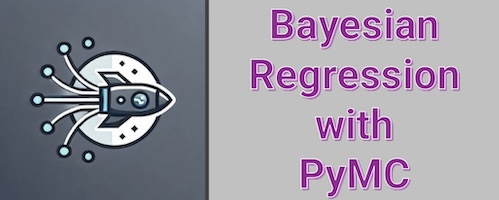

## 3. Bayesian Regression with PyMC and MCMC

Let's extend Bayesian inference to linear regression using PyMC.

**PyMC**: A probabilistic programming library for Bayesian statistical modeling. We use it to define priors, likelihoods, and perform posterior inference using MCMC.

**Markov Chain Monte Carlo (MCMC)** is a method used to approximate complex probability distributions by combining two key concepts: **Markov Chains** and **Monte Carlo methods**.

### Markov Chain:
A **Markov Chain** is a stochastic process that follows the **Markov property**, meaning that the future state depends only on the present state, not on past states. Mathematically, this is expressed as:

$
\
P(X_{t+1} | X_t, X_{t-1}, ..., X_1) = P(X_{t+1} | X_t)
\
$

This allows MCMC to explore the posterior distribution efficiently by generating a sequence of dependent samples.

### Monte Carlo Method:
A **Monte Carlo method** is a computational technique that uses **random sampling** to estimate numerical results. It is widely used in Bayesian inference to approximate integrals that are difficult to compute analytically.

### How MCMC Works:
- MCMC constructs a Markov Chain, where each step depends only on the previous step.
- It uses Monte Carlo sampling to explore the probability space.
- Over time, the chain converges to the true posterior distribution.
- The samples from the chain approximate the posterior distribution, but to ensure accuracy, we discard the early samples during the burn-in phase, a period where the chain is still converging to the target distribution and may not yet represent it well.

By combining these two methods, MCMC allows us to sample from complex posterior distributions in Bayesian inference, making it a powerful tool for probabilistic modeling.




### **Step-by-Step Breakdown of the Goal of the Script**

#### **1. Generate Synthetic Data**
- Creates a dataset where $ y $ follows a **linear relationship**:
  $\
  y = 2.5x + 1.0 + \text{noise}
  \$
- The noise is normally distributed to simulate **real-world measurement errors**.

#### **2. Define a Bayesian Model Using PyMC**
- Assigns **prior distributions** to the unknown parameters:
  - **Slope** ($ m $) and **Intercept** ($ b $) have **Normal priors** centered around 0.
  - **Noise** ($ \sigma $) follows a **Half-Normal prior**, ensuring it's positive.
- Specifies a **Likelihood function**, assuming $ y $ is normally distributed around the predicted values.

#### **3. Perform Bayesian Inference (MCMC Sampling)**
- Uses **Markov Chain Monte Carlo (MCMC)** to **sample from the posterior distribution** of the parameters.
- Generates **2000 samples** to estimate the most probable values of $ m $, $ b $, and $ \sigma $.

#### **4. Visualize the Posterior Distributions**
- Plots the **distributions of the learned parameters**, showing **uncertainty** in their values.
- This helps understand **how confident the model is** in its parameter estimates.


In [ ]:
#!pip install pymc

In [ ]:
# **PyMC: A probabilistic programming library for Bayesian statistical modeling**
import pymc as pm

# **Seaborn: A statistical data visualization library based on Matplotlib**
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# **Step 1: Generate Synthetic Data**
np.random.seed(42)  # Set seed for reproducibility
X = np.linspace(0, 1, 100)  # Generate 100 evenly spaced values between 0 and 1

# Define the true relationship (y = 2.5x + 1.0) with some added noise
true_slope, true_intercept = 2.5, 1.0
y = true_slope * X + true_intercept + np.random.normal(scale=0.2, size=len(X))

# **Step 2: Define the Bayesian Model using PyMC**
with pm.Model() as model:
    # **Priors (Beliefs before observing data)**
    slope = pm.Normal("slope", mu=0, sigma=10)  # Prior for slope, assuming normal distribution
    intercept = pm.Normal("intercept", mu=0, sigma=10)  # Prior for intercept, also normal
    sigma = pm.HalfNormal("sigma", sigma=1)  # Prior for noise (standard deviation), must be positive

    # **Likelihood (How data is generated given the parameters)**
    y_pred = pm.Normal("y_pred", mu=slope * X + intercept, sigma=sigma, observed=y)

    # **Step 3: Posterior Sampling (Inference)**
    trace = pm.sample(2000, return_inferencedata=True, cores=2)
    # This generates 2000 samples from the posterior distribution using MCMC

# **Step 4: Visualizing the Posterior Distributions**
pm.plot_posterior(trace)  # Plot the posterior distributions for slope, intercept, and sigma
plt.show()


### 🧠 What Does “Sampling from the Posterior” Mean?

When we say “we’re sampling 2000 times from the posterior using MCMC”, we don’t mean we’re shuffling or just repeating the same values. We mean something very specific:

In Bayesian inference, we don’t get a single best value (like in frequentist models). Instead, we want to understand all the possible values of parameters (like slope or intercept) that are likely given the data—this full distribution is called the posterior.

But the posterior is usually too complex to write down exactly, especially in models like neural nets or regressions with noise.

So, what do we do?

We simulate what that posterior looks like by drawing samples from it. That’s where MCMC (Markov Chain Monte Carlo) comes in.

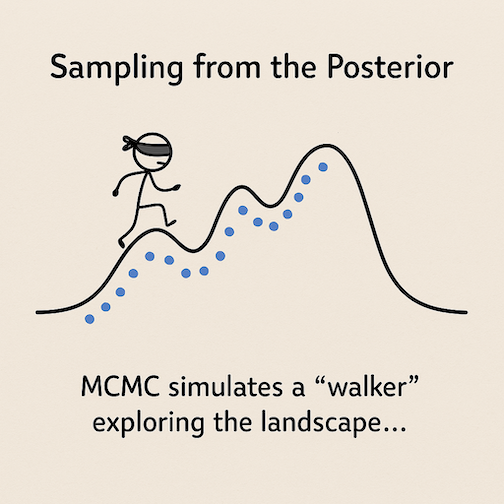

### **Explanation of the MCMC Sampling Progress Output**

When running Bayesian inference with MCMC, PyMC provides real-time progress updates. These statistics help monitor the sampling process.

- **Progress:** Displays a progress bar indicating the percentage of sampling completed.
- **Draws:** The number of posterior samples collected so far. Typically, thousands of draws are needed for accurate estimates.
- **Divergences:** The number of divergent samples, which indicate potential sampling issues (e.g., poor step size, high correlations). If this number is high, it may suggest model reparameterization is needed.
- **Step size:** The step size of the NUTS (No-U-Turn Sampler), which controls how far each sampling step moves in the probability space. A well-tuned step size helps improve sampling efficiency.
- **Grad evals:** The number of gradient evaluations performed per sample. Lower values indicate more efficient sampling.
- **Sampling Speed:** The rate at which PyMC is generating samples, usually measured in samples per second. A higher speed means more efficient sampling.
- **Elapsed:** The total time elapsed since sampling started.
- **Remaining:** The estimated time remaining until the sampling process is complete.

### **How to Interpret These Values**
- **Low Divergences (Ideally 0):** Sampling is stable and reliable.
- **Stable Step Size:** Indicates a well-behaved posterior distribution.
- **Higher Sampling Speed:** Faster sampling means more efficient computation.
- **Long Remaining Time?** Could mean a complex model or slow convergence.

💡 **If divergences are high**, you might need to:
1. **Reparameterize the model** (e.g., use centered vs. non-centered parameterization).  
2. **Increase tuning steps** (e.g., `pm.sample(tune=1000)`).  
3. **Check priors** to ensure they are not too weak or too strong.



### **Interpretation of Posterior Distributions**

The posterior distributions represent the inferred values of the **intercept**, **slope**, and **sigma (noise level)** in the Bayesian linear regression model. The **mean** of each distribution serves as the most probable estimate for the corresponding parameter, with the **94% Highest Density Interval (HDI)** indicating the range of likely values.

- The **intercept** is estimated at **0.97**, suggesting that when \( X = 0 \), the expected value of \( y \) is around **0.97**, with an HDI between **0.9 and 1.0**.
- The **slope** is estimated at **2.5**, meaning that for every unit increase in \( X \), \( y \) increases by approximately **2.5**, with an HDI between **2.4 and 2.6**.
- The **sigma** (uncertainty or noise in the data) is estimated at **0.18**, indicating a small level of variability in the observations, with an HDI between **0.16 and 0.21**.

Overall, the Bayesian model successfully recovers the true parameters used to generate the synthetic data, providing both point estimates and uncertainty quantification through the posterior distributions.


### ❓ Question:

How does the Bayesian regression model we implemented in PyMC compare to Naïve Bayes models, and can we consider them interchangeable?

✅ Answer:

The Naïve Bayes models (GaussianNB, MultinomialNB, and BernoulliNB) are primarily used for classification, while our PyMC model performs Bayesian Linear Regression, which is used for regression tasks.

However, if we were to compare:

- Our Bayesian Linear Regression model is most similar to GaussianNB because both assume a Normal (Gaussian) distribution for the data.
- Despite this similarity, they are not interchangeable since Naïve Bayes is for classification, whereas our PyMC model predicts continuous values in regression.

## UCI Wine Quality Dataset

We will use the UCI Wine Quality Dataset, which contains features describing different physicochemical properties of wines and their quality scores. The goal is to predict wine quality using Linear Regression, comparing Frequentist (Least Squares) and Bayesian (Bayesian Linear Regression with PyMC) approaches.

### Steps in the Analysis
1. Load & Explore the UCI Wine Quality Dataset.
2. Preprocess the data (handling missing values, feature scaling).
3. Frequentist Approach: Linear Regression using Scikit-Learn.
4. Bayesian Approach: Bayesian Linear Regression using PyMC.
5. Compare Results: MLE vs. Bayesian Inference.

Now, let's implement it!

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pymc as pm
import arviz as az  # Arviz is useful for posterior analysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import multiprocessing

# --------- FIX FOR MULTIPROCESSING ISSUE ---------
# PyMC uses JAX, which is multithreaded. To prevent issues with os.fork(), we set the start method to "spawn".
multiprocessing.set_start_method("spawn", force=True)

# ------------------------------------
# 1. Load the Wine Quality Dataset
# ------------------------------------
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=";")

# Display dataset information
print("Dataset Preview:")
print(df.head())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Define Features (X) and Target (y)
X = df.drop(columns=['quality'])  # Features: All columns except 'quality'
y = df['quality']  # Target variable: Wine quality

# ------------------------------------
# 2. Train-Test Split
# ------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing features (important for Bayesian models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------------------------------------
# 3. Frequentist Approach: Linear Regression
# ------------------------------------
lr_model = LinearRegression()  # Initialize the model
lr_model.fit(X_train_scaled, y_train)  # Train the model

# Predictions
y_pred_frequentist = lr_model.predict(X_test_scaled)

# Performance Metrics
mse_frequentist = mean_squared_error(y_test, y_pred_frequentist)
r2_frequentist = r2_score(y_test, y_pred_frequentist)

print("\nFrequentist Linear Regression Results:")
print(f"Mean Squared Error: {mse_frequentist:.4f}")
print(f"R² Score: {r2_frequentist:.4f}")

# ------------------------------------
# 4. Bayesian Approach: Bayesian Linear Regression with PyMC
# ------------------------------------
with pm.Model() as bayesian_model:
    # Priors: These define our assumptions about the parameters before seeing data
    beta = pm.Normal("beta", mu=0, sigma=1, shape=X_train_scaled.shape[1])  # Coefficients
    intercept = pm.Normal("intercept", mu=0, sigma=1)  # Intercept
    sigma = pm.HalfNormal("sigma", sigma=1)  # Standard deviation of residuals

    # Likelihood (how data is generated given parameters)
    mu = pm.math.dot(X_train_scaled, beta) + intercept  # Linear equation
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y_train)  # Observed target values

    # Posterior Sampling: Draw samples from the posterior distribution
    trace = pm.sample(2000, return_inferencedata=True, cores=1, random_seed=42)  # Use cores=1 to avoid multiprocessing issues

# Posterior Plot (Visualizing the Bayesian estimates)
az.plot_posterior(trace)
plt.show()

# ------------------------------------
# 5. Posterior Predictions
# ------------------------------------
with bayesian_model:
    post_pred = pm.sample_posterior_predictive(trace, var_names=["beta", "intercept"], random_seed=42)

# Extract posterior samples for beta and intercept
beta_samples = trace.posterior["beta"].stack(sample=("chain", "draw")).values  # Shape: (num_samples, num_features)
intercept_samples = trace.posterior["intercept"].stack(sample=("chain", "draw")).values  # Shape: (num_samples,)

# Compute Bayesian predictions using multiple posterior samples
y_pred_bayesian_samples = np.dot(X_test_scaled, beta_samples) + intercept_samples  # Shape: (num_test_samples, num_samples)

# Take the mean across all posterior samples to get a single prediction per test sample
y_pred_bayesian = y_pred_bayesian_samples.mean(axis=1)


# Performance Metrics for Bayesian Model
mse_bayesian = mean_squared_error(y_test, y_pred_bayesian)
r2_bayesian = r2_score(y_test, y_pred_bayesian)

print("\nBayesian Linear Regression Results:")
print(f"Mean Squared Error: {mse_bayesian:.4f}")
print(f"R² Score: {r2_bayesian:.4f}")

# ------------------------------------
# 6. Compare Frequentist vs Bayesian
# ------------------------------------
results_df = pd.DataFrame({
    "Method": ["Frequentist (MLE)", "Bayesian Inference"],
    "Mean Squared Error": [mse_frequentist, mse_bayesian],
    "R² Score": [r2_frequentist, r2_bayesian]
})

print("\nFrequentist vs Bayesian Comparison:")
print(results_df)

# ------------------------------------
# 7. Visualization: Predictions Comparison
# ------------------------------------
plt.figure(figsize=(8, 5))
jitter = np.random.normal(0, 0.02, size=len(y_pred_bayesian))  # Small noise
plt.scatter(y_test, y_pred_frequentist, label="Frequentist Predictions", alpha=0.7, color="blue")
plt.scatter(y_test, y_pred_bayesian + jitter, label="Bayesian Predictions", alpha=0.4, color="red")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--")
plt.xlabel("True Quality")
plt.ylabel("Predicted Quality")
plt.title("Comparison: Frequentist vs Bayesian Regression")
plt.legend()
plt.show()


In this Bayesian linear regression model, the 11 beta parameters correspond directly to the 11 input features from the wine dataset (e.g., alcohol, pH, density, etc.). Each beta[i] represents the estimated effect of the i-th feature on the target variable, wine quality, after accounting for all other features. These coefficients are learned from the data during sampling, and their posterior distributions reflect the model's uncertainty about the influence of each feature. This one-to-one mapping between features and beta values allows for interpretable insights into which characteristics most strongly impact wine quality.

**Analysis of Wine Quality Prediction Results**

The dataset preview confirms that the UCI Wine Quality dataset contains various chemical properties of wine and their corresponding quality scores. No missing values are present, ensuring that all features are available for analysis.

**Frequentist Linear Regression Results**

The Frequentist Linear Regression model achieved a Mean Squared Error (MSE) of 0.3900 and an R² score of 0.4032. This indicates that the model explains approximately 40.32% of the variance in wine quality based on the given features. While this suggests moderate predictive performance, it also implies that other unobserved factors contribute to wine quality.

**Bayesian Linear Regression Results**

The Bayesian Linear Regression model performed nearly identically to the frequentist approach, with an MSE of 0.3901 and an R² score of 0.4030. The similarity in performance suggests that the Bayesian model successfully captured the same underlying relationships in the data. The slightly lower R² score (0.4030 vs. 0.4032) suggests a minimal difference in predictive power.

**Comparison: Frequentist vs. Bayesian**

The results indicate no significant performance difference between the two approaches. The Frequentist model provides a point estimate for the regression coefficients, while the Bayesian model offers posterior distributions, allowing for uncertainty quantification. However, in this case, both models yield nearly identical predictions, meaning that the added complexity of Bayesian inference does not provide a substantial advantage in terms of accuracy.

This suggests that the dataset is well-suited for linear modeling and does not exhibit significant parameter uncertainty that would justify the use of a Bayesian approach. However, the Bayesian method remains valuable for capturing uncertainty and making probabilistic predictions in scenarios with limited data or strong prior knowledge.

### **From Probabilities to Predictions: Introducing Bayesian Neural Networks**

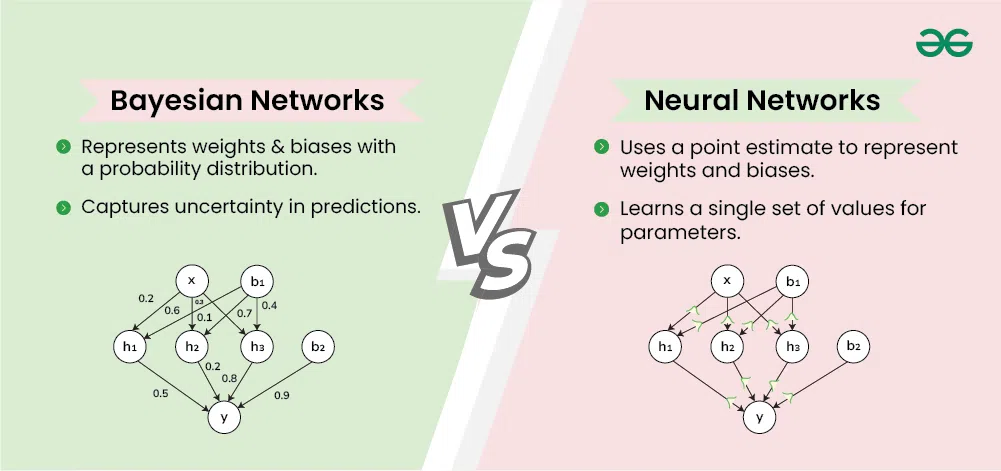

Ref: https://www.geeksforgeeks.org/differences-between-bayesian-networks-and-neural-networks/

## Bayesian Neural Networks (BNNs) – A Bridge to Deep Learning
As we transition to Neural Networks, it’s valuable to first introduce Bayesian Neural Networks (BNNs). These models extend Bayesian principles to deep learning, allowing us to quantify uncertainty and improve model robustness, particularly in settings with limited data or high-stakes applications.

### Why Bayesian Neural Networks (BNNs)?
In traditional neural networks, weights ($\theta$) are treated as fixed parameters learned through optimization (e.g., gradient descent). However, this approach does not quantify uncertainty in predictions.

BNNs address this limitation by placing probability distributions over the weights, allowing us to capture both epistemic (model) and aleatoric (data) uncertainty. This is particularly valuable in applications like medical diagnosis, autonomous systems, and financial forecasting, where understanding uncertainty is crucial.

- Epistemic uncertainty is the uncertainty in the model due to limited knowledge, which can be reduced with more data.

- Aleatoric uncertainty is the inherent randomness in the data that cannot be reduced, even with more information.


### Key Differences: Traditional Neural Networks vs. Bayesian Neural Networks

| Feature | Traditional Neural Networks | Bayesian Neural Networks (BNNs) |
|---------|-----------------------------|--------------------------------|
| **Weights ($\theta$)** | Fixed values learned via optimization | Probability distributions over weights (uncertainty-aware) |
| **Uncertainty Estimation** | No direct way to measure confidence | Provides confidence intervals and uncertainty estimates |
| **Training Method** | Backpropagation + SGD/Adam | Bayesian inference (Variational Inference, MCMC) |
| **Prediction** | Single best output (point estimate) | Predictive distribution (mean & variance) |
| **Generalization** | Prone to overfitting on small datasets | Better generalization with quantified uncertainty |
| **Use Cases** | Standard ML tasks | High-stakes applications requiring uncertainty estimates |


### Implementing a Simple Bayesian Neural Network (BNN)
Below is an example of a Bayesian Neural Network with one hidden layer using PyMC. This model learns a probabilistic mapping between inputs ($X$) and outputs ($y$), capturing uncertainty when predicting a noisy sine wave. Our approach is a BNN trained using MCMC via PyMC—a powerful way to model uncertainty in deep learning!


In [ ]:
# -------------------------------
# Import Necessary Libraries
# -------------------------------
import numpy as np  # For numerical computations
import pymc as pm  # PyMC for Bayesian inference
import pytensor.tensor as pt  # PyTensor for symbolic computations
import matplotlib.pyplot as plt  # For plotting results
import multiprocessing  # To handle parallel computation issues

# -------------------------------
# Fix Multiprocessing Issue (Important for PyMC on Some Systems)
# -------------------------------
# PyMC uses JAX for computation, which can cause issues with multiprocessing (especially on macOS and Colab).
# Setting 'spawn' ensures that new processes start cleanly to avoid crashes.
multiprocessing.set_start_method("spawn", force=True)

# -------------------------------
# Generate Synthetic Dataset (Noisy Sine Wave)
# -------------------------------
X = np.linspace(-1, 1, 100)[:, None]  # Generate 100 evenly spaced points in range [-1,1], reshaped to column vector
y = np.sin(3 * X) + 0.3 * np.random.randn(100, 1)  # True function: sin(3x), with added Gaussian noise (std=0.3)

# ------------------------------------------------
# Define Bayesian Neural Network (BNN) Model in PyMC
# ------------------------------------------------
with pm.Model() as bnn:
    # Convert X into a PyMC symbolic variable for flexibility (allows updating input data during inference)
    X_var = pm.Data("X", X)

    # -------------------------------
    # Priors for Weights and Biases
    # -------------------------------
    # We use Normal priors for the network parameters (weights & biases), assuming Gaussian distributions.

    # First Layer (Input → Hidden)
    w1 = pm.Normal("w1", mu=0, sigma=1, shape=(1, 10))  # 10 neurons in the hidden layer (1 input → 10 outputs)
    b1 = pm.Normal("b1", mu=0, sigma=1, shape=(10,))  # Bias for each neuron in the hidden layer

    # Second Layer (Hidden → Output)
    w2 = pm.Normal("w2", mu=0, sigma=1, shape=(10, 1))  # 10 neurons in hidden layer → 1 output
    b2 = pm.Normal("b2", mu=0, sigma=1)  # Single bias for output neuron

    # -------------------------------
    # Define Network Computation
    # -------------------------------
    # Hidden layer with tanh activation function
    hidden = pm.math.tanh(pm.math.dot(X_var, w1) + b1)

    # Output layer with linear activation (regression task)
    output = pm.math.dot(hidden, w2) + b2

    # -------------------------------
    # Likelihood (Observation Model)
    # -------------------------------
    # We assume the observed data follows a Normal distribution centered around the model's output.
    sigma = pm.HalfNormal("sigma", sigma=1.0)  # Prior for noise (ensures positive standard deviation)
    y_obs = pm.Normal("y_obs", mu=output, sigma=sigma, observed=y)  # Likelihood function

    # -------------------------------
    # Bayesian Inference: Sample from Posterior
    # -------------------------------
    # We use MCMC to draw 2000 posterior samples and tune hyperparameters for stability.
    trace = pm.sample(
        2000,  # Number of posterior draws (samples)
        return_inferencedata=True,  # Return results in an easy-to-analyze format
        target_accept=0.95,  # Higher acceptance rate to reduce divergences and improve numerical stability
        random_seed=42  # Ensure reproducibility
    )

# -------------------------------
# Visualize Posterior Predictions
# -------------------------------
pm.plot_posterior(trace)  # Plot posterior distributions of model parameters
plt.show()


Every time you run the model, the results vary because Bayesian inference relies on random sampling (MCMC) to estimate the posterior distribution. This means each run generates a slightly different set of samples, leading to small variations in predictions—even with the same data and priors. Setting a random seed can help make results more consistent, but some variability is expected in Bayesian methods.

### Interpretation of Bayesian Neural Network Sampling Results

The Bayesian Neural Network (BNN) was successfully trained using Markov Chain Monte Carlo (MCMC) sampling, as shown by the posterior distributions of weights, biases, and noise ($\sigma$).

#### **Key Observations:**
- No Divergences (0): The MCMC sampler ran smoothly without numerical instability.  
- Step Size (0.01): A small step size indicates careful exploration of the posterior, ensuring accurate parameter estimation.  
- Gradient Evaluations (511 per draw): This suggests a moderately complex model, requiring significant gradient computations per step.  
- Sampling Speed (~20 draws/sec): A reasonable speed for a Bayesian neural network, given the number of parameters.  
- Total Draws (3000 per chain): Sufficient samples were collected for stable posterior estimation.  

#### **Posterior Distributions Analysis:**
- Each plot represents the posterior distribution of a parameter (weights $w_1$, $w_2$, biases $b_1$, $b_2$, and noise level $\sigma$).
- The mean value and 94% Highest Density Interval (HDI) indicate the most likely range for each parameter.
- The weights and biases have well-defined distributions, meaning the network learned meaningful parameter values.
- The $\sigma$ parameter (noise level) is centered around 0.29, showing a moderate level of uncertainty in the predictions.


The Bayesian Neural Network successfully learned meaningful weights and biases, with no divergences and stable posterior estimates. The distributional nature of weights allows for uncertainty quantification, making this model useful for probabilistic predictions.


### Evaluating and Visualizing Bayesian Neural Network Predictions

The Below code builds on the first by adding posterior predictive sampling and model evaluation. After training the Bayesian Neural Network, it draws predictions from the posterior distribution to estimate output uncertainty. It also calculates RMSE and R² to assess prediction accuracy, and visualizes the results with credible intervals. This step is crucial for understanding how well the model generalizes to data and quantifying uncertainty — both key advantages of Bayesian methods.

In [ ]:
# -------------------------------
# Import Necessary Libraries
# -------------------------------
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import multiprocessing

# -------------------------------
# Fix Multiprocessing for PyMC
# -------------------------------
multiprocessing.set_start_method("spawn", force=True)

# -------------------------------
# Generate Synthetic Dataset
# -------------------------------
X = np.linspace(-1, 1, 100)[:, None]
y = np.sin(3 * X) + 0.3 * np.random.randn(100, 1)

# -------------------------------
# Define Bayesian Neural Network (BNN)
# -------------------------------
with pm.Model() as bnn:
    X_data = pm.Data("X", X)

    # Priors for weights and biases
    w1 = pm.Normal("w1", mu=0, sigma=1, shape=(1, 10))
    b1 = pm.Normal("b1", mu=0, sigma=1, shape=(10,))
    w2 = pm.Normal("w2", mu=0, sigma=1, shape=(10, 1))
    b2 = pm.Normal("b2", mu=0, sigma=1)

    # Neural network forward pass
    hidden = pm.math.tanh(pm.math.dot(X_data, w1) + b1)
    output = pm.math.dot(hidden, w2) + b2

    # Likelihood
    sigma = pm.HalfNormal("sigma", sigma=1.0)
    y_obs = pm.Normal("y_obs", mu=output, sigma=sigma, observed=y)

    # Posterior sampling
    trace = pm.sample(2000, target_accept=0.95, return_inferencedata=True, random_seed=42)

# -------------------------------
# Posterior Predictive Sampling
# -------------------------------
with bnn:
    posterior_pred = pm.sample_posterior_predictive(
        trace,
        var_names=["y_obs"],
        return_inferencedata=True,
        random_seed=42
    )

# Access samples from InferenceData
y_samples = posterior_pred.posterior_predictive["y_obs"].values  # shape: (chain, draw, 100, 1)
y_samples = y_samples.reshape(-1, y_samples.shape[-2])           # reshape to (samples, 100)
y_pred_mean = y_samples.mean(axis=0)                             # shape: (100,)

# -------------------------------
# Compute Evaluation Metrics
# -------------------------------
y_true = y.flatten()
y_pred_mean = y_pred_mean.flatten()

mse = mean_squared_error(y_true, y_pred_mean)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred_mean)

print("\nBayesian Neural Network Performance:")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# -------------------------------
# Optional: Plot Predictions with Uncertainty
# -------------------------------
plt.figure(figsize=(8, 5))
plt.scatter(X, y_true, label="True Data", color="black", alpha=0.6)
plt.plot(X, y_pred_mean, label="BNN Prediction (mean)", color="red")
plt.fill_between(
    X.ravel(),
    np.percentile(y_samples, 2.5, axis=0),
    np.percentile(y_samples, 97.5, axis=0),
    color="red",
    alpha=0.3,
    label="95% Credible Interval"
)
plt.title("Bayesian Neural Network Prediction with Uncertainty")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## **Bridging Bayesian Methods and Neural Networks**

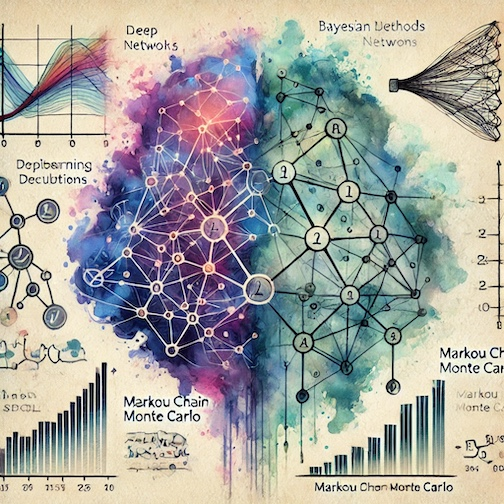

Bayesian methods extend to Neural Networks by incorporating uncertainty-aware learning, allowing models to generalize better, particularly in small-data scenarios or applications where quantifying uncertainty is critical, such as medicine and autonomous systems.


As we transition from Bayesian Learning to Neural Networks, it's helpful to compare how these frameworks approach learning, uncertainty, and data efficiency:

\
\begin{array}{|c|c|c|c|}
\hline
\textbf{Aspect} & \textbf{Classical ML (Frequentist)} & \textbf{Bayesian ML} & \textbf{Neural Networks} \\
\hline
\textbf{Model Complexity} & \text{Linear Models, Trees} & \text{Probabilistic Models} & \text{Deep Networks} \\
\hline
\textbf{Uncertainty Estimation} & \text{No} & \text{Yes (Distributions)} & \text{No (Standard NNs)} \\
\hline
\textbf{Training Data Needs} & \text{Works well with small data} & \text{Works well with small data} & \text{Needs large data} \\
\hline
\textbf{Generalization} & \text{Prone to overfitting} & \text{Regularized by priors} & \text{Requires careful tuning} \\
\hline
\end{array}


In standard (Frequentist) Neural Networks, we optimize weights using Stochastic Gradient Descent (SGD) to find a single best solution. In contrast, Bayesian Neural Networks (BNNs) maintain a distribution over weights instead of fixed values.

\
\begin{array}{|c|c|c|}
\hline
\textbf{Aspect} & \textbf{Frequentist Neural Networks} & \textbf{Bayesian Neural Networks (BNNs)} \\
\hline
\textbf{Weight Representation} & \text{Single best set of weights} & \text{Distribution over weights} \\
\hline
\textbf{Optimization} & \text{SGD, Adam (Gradient Descent)} & \text{Bayesian Inference (MCMC, VI)} \\
\hline
\textbf{Uncertainty Estimation} & \text{No} & \text{Yes (Predictive Distributions)} \\
\hline
\textbf{Use Cases} & \text{General ML Tasks} & \text{High-stakes AI (Medicine, Robotics)} \\
\hline
\end{array}


**Why does this matter?**  
Bayesian inference allows uncertainty quantification in predictions, making models more reliable in scenarios where decision confidence is crucial.


### Frequentist and Bayesian Neural Networks with Optimized Variational Inference (VI)

This project explores the differences between Frequentist and Bayesian Neural Networks (BNNs) using the California Housing dataset. The goal is to predict housing prices based on various features while comparing the performance, computational efficiency, and uncertainty estimation of both approaches. This version includes optimized Variational Inference (VI) for Bayesian inference, significantly improving computational efficiency while maintaining accuracy.

**Variational Inference (VI)** is a method in Bayesian inference that approximates complex probability distributions with simpler ones by optimizing a function—usually by minimizing KL (Kullback-Leibler) divergence, which measures how different one probability distribution is from another—to make computations faster and more efficient.

### California Housing Dataset Overview

The California Housing dataset is a well-known dataset used for regression problems in machine learning. It consists of housing-related features collected from different districts in California. The dataset is commonly used to predict median house values based on socioeconomic and geographical attributes.

### Dataset Characteristics:
- **Total Samples (Rows):** 20,640
- **Total Features (Columns):** 8
- **Target Variable:** Median House Value
- **Feature Breakdown:**
  - **Median Income** (Average income of residents in the district)
  - **House Age** (Median age of houses in the district)
  - **Number of Rooms** (Total number of rooms per household)
  - **Population Density** (Total population in the district)
  - **Latitude** (Geographical coordinate)
  - **Longitude** (Geographical coordinate)
  - **Number of Bedrooms** (Total number of bedrooms per household)
  - **House Value** (Median house price in the district, used as the target variable)

### Train-Test Split:
The dataset is divided into training and testing subsets for model evaluation:
- Training Set (80%) → 16,512 samples
- Testing Set (20%) → 4,128 samples

### Preprocessing Steps:
- The dataset is standardized using feature scaling to improve the performance of neural networks.
- A train-test split ensures that models generalize well to unseen data.

This dataset is moderate in size, making it suitable for both traditional machine learning models and deep learning architectures. It also provides a good benchmark for testing Bayesian and Frequentist approaches in neural network regression tasks.

### **Approach 1: Frequentist Neural Network (FNN)**
A Frequentist Neural Network (FNN) is built using TensorFlow/Keras, a popular deep learning framework for building and training neural networks efficiently. This model assumes that all parameters (weights and biases) are fixed values, learned through optimization.

- **Architecture:**
  - Input layer corresponding to the number of features in the dataset.
  - Two hidden layers with ReLU activation.
  - One output neuron for regression.
- **Training Setup:**
  - Optimized using Mean Squared Error (MSE) loss function.
  - Trained using 20 epochs and batch size = 64 for efficiency.
  - JIT Compilation is enabled for faster execution.
- **Performance Evaluation:**
  - Predictions are compared to actual housing prices using Mean Squared Error (MSE) and R² Score.

### **Approach 2: BNN Using Optimized Variational Inference (VI)**
A BNN introduces uncertainty estimation by treating weights and biases as probability distributions rather than fixed values. This allows the model to quantify uncertainty in predictions, which is useful in real-world applications.

- **Bayesian Priors:**
  - Weights and biases are assigned Normal priors with a mean of 0 and a standard deviation of 0.5.
- **Forward Pass (Bayesian Inference):**
  - A neural network is created using PyMC, where the hidden layers apply a ReLU activation function.
  - The output is modeled as a Normal distribution with an estimated mean and standard deviation.
- **Optimized Variational Inference (VI) for Posterior Estimation:**
  - Instead of traditional MCMC sampling, VI is used for faster Bayesian inference.
  - The posterior distribution of the weights is inferred using Automatic Differentiation Variational Inference (ADVI).
  - 10,000 VI training iterations ensure proper convergence.
  - An adaptive Adagrad optimizer helps fine-tune learning rates.
  - 1,500 posterior samples are drawn for stable predictions.
- **Uncertainty-Aware Predictions:**
  - After inference, predictions are made by averaging the posterior predictive samples.
  - Performance is evaluated using MSE and R² Score.

### Key Takeaways
- Frequentist NNs are faster but do not quantify uncertainty.
- Bayesian NNs offer uncertainty-aware predictions, making them ideal for applications where knowing confidence is important (e.g., medical AI, financial modeling).
- Variational Inference (VI) is significantly faster than traditional MCMC sampling while maintaining accuracy.
- This optimized version of VI significantly improves runtime while still leveraging Bayesian inference to quantify uncertainty.



In [ ]:
# Upgrade pip first to avoid dependency issues
#!pip install --upgrade pip --quiet

# Install dependencies in the correct order
#!pip install numpy==1.26.4 setuptools==68.0.0 --quiet  # Install these first for stability
#!pip install tensorflow keras pymc theano pytensor --quiet  # Install ML-related packages
#!pip install ipython jedi --quiet  # Ensure IPython & Jedi are installed properly


In [ ]:
import numpy as np  # Import NumPy for numerical operations
import pandas as pd  # Import Pandas for handling datasets
import pymc as pm  # Import PyMC for Bayesian inference
import pytensor.tensor as pt  # Import PyTensor for tensor operations in Bayesian modeling
import tensorflow as tf  # Import TensorFlow for deep learning models
import random  # Import random module for setting seeds

# Import necessary Keras components for building neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Import Scikit-Learn utilities for data preprocessing and evaluation
from sklearn.model_selection import train_test_split  # For splitting dataset into training and testing
from sklearn.preprocessing import StandardScaler  # For normalizing feature values
from sklearn.metrics import mean_squared_error, r2_score  # For evaluating model performance
from sklearn.datasets import fetch_california_housing  # For loading California housing dataset

# -------------------------
# 1. Set Random Seeds for Reproducibility
# -------------------------
random.seed(42)  # Set random seed for Python's random module
np.random.seed(42)  # Set seed for NumPy operations
tf.random.set_seed(42)  # Set seed for TensorFlow operations (ensures consistent model initialization)

# -------------------------
# 2. Load & Preprocess Data (California Housing)
# -------------------------
# Load California housing dataset
housing = fetch_california_housing()

# Convert feature data into a Pandas DataFrame for easy manipulation
X = pd.DataFrame(housing.data, columns=housing.feature_names)

# Extract target variable (median house value)
y = housing.target

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features using StandardScaler (helps neural networks converge faster)
scaler = StandardScaler()  # Initialize scaler
X_train_scaled = scaler.fit_transform(X_train)  # Fit to training data and transform it
X_test_scaled = scaler.transform(X_test)  # Transform test data using same parameters

# Enable XLA Compilation for TensorFlow (speeds up model execution by optimizing computations)
tf.config.optimizer.set_jit(True)

# -------------------------
# 3. Frequentist Neural Network (Optimized)
# -------------------------
# Define a simple feedforward neural network (Frequentist approach)
def build_frequentist_nn():
    model = Sequential([  # Define a sequential neural network model
        Input(shape=(X_train_scaled.shape[1],)),  # Input layer matching feature dimensions
        Dense(10, activation='relu'),  # First hidden layer with 10 neurons and ReLU activation
        Dense(5, activation='relu'),   # Second hidden layer with 5 neurons and ReLU activation
        Dense(1)  # Output layer (single neuron for regression)
    ])
    # Compile the model with Adam optimizer and Mean Squared Error (MSE) loss function
    model.compile(optimizer=tf.keras.optimizers.Adam(), loss='mse', jit_compile=True)
    return model

# Instantiate and train the Frequentist NN model
nn_model = build_frequentist_nn()

# Train the model with 75 epochs and a batch size of 64
# (More epochs help balance against Bayesian inference steps in comparison)
nn_model.fit(X_train_scaled, y_train, epochs=75, batch_size=64, verbose=0)

# Make predictions on test data
y_pred_frequentist = np.squeeze(nn_model.predict(X_test_scaled, verbose=0))

# -------------------------
# 4. Evaluate Model Performance
# -------------------------
print("\nFrequentist NN Results:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_frequentist):.4f}")  # Print MSE
print(f"R² Score: {r2_score(y_test, y_pred_frequentist):.4f}")  # Print R² score to evaluate performance


Frequentist NN Results:
Mean Squared Error: 0.3228
R² Score: 0.7536


In [ ]:
# -------------------------
# 3. Bayesian Neural Network (Optimized with Variational Inference)
# -------------------------
with pm.Model() as bnn_model:  # Define a Bayesian neural network model in PyMC
    X_var = pm.Data("X", X_train_scaled)  # Define input data as a shared variable for Bayesian inference

    # **More Informative Priors (Tighter Distributions)**
    # Prior distributions define initial beliefs about the parameters before observing data
    w1 = pm.Normal("w1", mu=0, sigma=0.5, shape=(X_train_scaled.shape[1], 10))  # First layer weights
    b1 = pm.Normal("b1", mu=0, sigma=0.5, shape=(10,))  # First layer biases
    w2 = pm.Normal("w2", mu=0, sigma=0.5, shape=(10, 5))  # Second layer weights
    b2 = pm.Normal("b2", mu=0, sigma=0.5, shape=(5,))  # Second layer biases
    w3 = pm.Normal("w3", mu=0, sigma=0.5, shape=(5, 1))  # Output layer weights
    b3 = pm.Normal("b3", mu=0, sigma=0.5)  # Output layer bias

    # **ReLU Activation for More Stability**
    hidden1 = pm.math.maximum(pm.math.dot(X_var, w1) + b1, 0)  # First hidden layer with ReLU activation
    hidden2 = pm.math.maximum(pm.math.dot(hidden1, w2) + b2, 0)  # Second hidden layer with ReLU activation
    output = pm.math.dot(hidden2, w3) + b3  # Compute the final output
    output = pt.flatten(output)  # Flatten output for compatibility with observed data

    # **Stronger Regularization (Avoids Overconfidence in Predictions)**
    sigma = pm.HalfNormal("sigma", sigma=0.2)  # Define a Half-Normal distribution for output noise
    y_obs = pm.Normal("y_obs", mu=output, sigma=sigma, observed=pm.Data("y", y_train))  # Likelihood function

    # **Train Longer with Early Stopping for More Stability**
    approx = pm.fit(n=10_000, method="advi", obj_optimizer=pm.adagrad_window(learning_rate=0.01))  # Variational Inference
    trace = approx.sample(1500)  # Draw 1500 samples from the approximate posterior for better stability

# -------------------------
# 4. Bayesian Predictions on Test Data
# -------------------------
with bnn_model:
    pm.set_data({"X": X_test_scaled, "y": y_test})  # Update the data for prediction phase
    post_pred = pm.sample_posterior_predictive(trace, var_names=["y_obs"], progressbar=False)  # Sample posterior predictive distribution

# Extract posterior predictive samples
y_pred_bayesian_samples = post_pred.posterior_predictive["y_obs"]  # Extract predicted values

y_pred_bayesian = y_pred_bayesian_samples.mean(dim=["chain", "draw"]).values.squeeze()  # Compute mean prediction across samples

# Print Bayesian Model Results
print("\nFinal Bayesian NN Results (Optimized VI with More Stability & Longer Training):")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_bayesian):.4f}")  # Compute and print Mean Squared Error
print(f"R² Score: {r2_score(y_test, y_pred_bayesian):.4f}")  # Compute and print R² score to evaluate model performance


Output()


Final Bayesian NN Results (Optimized VI with More Stability & Longer Training):
Mean Squared Error: 0.3170
R² Score: 0.7581


Building on the previous exploration of Frequentist and Bayesian Neural Networks, this project further refines the Bayesian approach by improving inference techniques. The primary change is the shift from VI to MCMC sampling, which provides a more accurate representation of uncertainty but at the cost of increased computational time.

### Key Differences from the Previous Approach
- **Inference Method:**
  - Previously, we used ADVI, which approximates the posterior distribution using optimization.
  - Now, we employ MCMC, specifically the No-U-Turn Sampler (NUTS), which directly samples from the true posterior.
  - This provides more reliable uncertainty estimates at the expense of increased computational time.

- **Sampling Strategy:**
  - VI was much faster but could introduce approximation errors.
  - MCMC provides higher accuracy by fully exploring the posterior but is computationally intensive.
  - We use multiple chains and parallel computation to make MCMC more efficient.

- **Why Use MCMC Instead of VI?**
  - VI makes assumptions about the posterior distribution, which might not always hold.
  - MCMC, particularly NUTS, is more flexible and does not rely on such assumptions, leading to better posterior estimates.

This enhanced approach refines Bayesian inference by replacing fast but approximate VI with the more accurate MCMC sampling technique. While this method requires more computational resources, it leads to better uncertainty quantification, making it particularly useful for high-stakes applications where knowing the confidence in predictions is crucial.

- The **No-U-Turn Sampler (NUTS)** is an adaptive Markov Chain Monte Carlo (MCMC) algorithm used in Bayesian inference to efficiently sample from complex posterior distributions. It is an extension of Hamiltonian Monte Carlo (HMC) that automatically determines the optimal trajectory length by stopping when the sampled path starts reversing direction (a "U-Turn"), preventing unnecessary computations. NUTS eliminates the need for manual tuning of step sizes, making it particularly effective for high-dimensional probabilistic models. It is widely used in PyMC, Stan, and Bayesian deep learning, offering faster convergence and more efficient exploration of probability distributions.
- **Automatic Differentiation Variational Inference (ADVI)** is a scalable and automated variational inference (VI) technique used in Bayesian modeling to approximate complex posterior distributions. Instead of using Markov Chain Monte Carlo (MCMC) sampling, ADVI optimizes a simpler, parametric distribution (often a Gaussian) to closely match the true posterior by minimizing the Kullback-Leibler (KL) divergence. It leverages automatic differentiation to efficiently compute gradients and update variational parameters, making it much faster than traditional MCMC methods. ADVI is particularly useful for large datasets and high-dimensional models, providing a computationally efficient alternative to Bayesian inference in frameworks like PyMC and Stan.



In [ ]:
# ⚠️ WARNING: This script may take 5+ hours to run due to the computational cost of Bayesian MCMC sampling.
# Frequentist NN runs in seconds, but BNN using MCMC is significantly slower. Consider using a GPU if possible.

import numpy as np  # Import NumPy for numerical computations
import pandas as pd  # Import Pandas for data handling
import pymc as pm  # Import PyMC for Bayesian inference
import pytensor.tensor as pt  # Import PyTensor for tensor operations in Bayesian modeling
import tensorflow as tf  # Import TensorFlow for deep learning models

# Import necessary Keras components for building neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Import Scikit-Learn utilities for data preprocessing and evaluation
from sklearn.model_selection import train_test_split  # For splitting dataset into training and testing
from sklearn.preprocessing import StandardScaler  # For normalizing feature values
from sklearn.metrics import mean_squared_error, r2_score  # For evaluating model performance
from sklearn.datasets import fetch_california_housing  # For loading California housing dataset

# -------------------------
# 1. Load & Preprocess Data (California Housing)
# -------------------------
# Load California housing dataset
housing = fetch_california_housing()

# Convert feature data into a Pandas DataFrame for easy manipulation
X = pd.DataFrame(housing.data, columns=housing.feature_names)

# Extract target variable (median house value)
y = housing.target

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features using StandardScaler (helps neural networks converge faster)
scaler = StandardScaler()  # Initialize scaler
X_train_scaled = scaler.fit_transform(X_train)  # Fit to training data and transform it
X_test_scaled = scaler.transform(X_test)  # Transform test data using same parameters

# Enable XLA Compilation for TensorFlow (speeds up model execution by optimizing computations)
tf.config.optimizer.set_jit(True)

# -------------------------
# 2. Frequentist Neural Network (Optimized)
# -------------------------
# Define a simple feedforward neural network (Frequentist approach)
def build_frequentist_nn():
    model = Sequential([  # Define a sequential neural network model
        Input(shape=(X_train_scaled.shape[1],)),  # Input layer matching feature dimensions
        Dense(10, activation='relu'),  # First hidden layer with 10 neurons and ReLU activation
        Dense(5, activation='relu'),   # Second hidden layer with 5 neurons and ReLU activation
        Dense(1)  # Output layer (single neuron for regression)
    ])
    # Compile the model with Adam optimizer and Mean Squared Error (MSE) loss function
    model.compile(optimizer=tf.keras.optimizers.Adam(), loss='mse', jit_compile=True)
    return model

# Instantiate and train the Frequentist NN model
nn_model = build_frequentist_nn()

# Train the model with 75 epochs and a batch size of 64
nn_model.fit(X_train_scaled, y_train, epochs=75, batch_size=64, verbose=0)

# Make predictions on test data
y_pred_frequentist = np.squeeze(nn_model.predict(X_test_scaled, verbose=0))

# Performance Metrics
print("\nFrequentist NN Results:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_frequentist):.4f}")  # Print MSE
print(f"R² Score: {r2_score(y_test, y_pred_frequentist):.4f}")  # Print R² score

# -------------------------
# 3. Bayesian Neural Network (Optimized with MCMC)
# -------------------------
with pm.Model() as bnn_model:  # Define a Bayesian neural network model in PyMC
    X_var = pm.Data("X", X_train_scaled)  # Define input data as a shared variable for Bayesian inference

    # **More Informative Priors (Tighter Distributions)**
    w1 = pm.Normal("w1", mu=0, sigma=0.5, shape=(X_train_scaled.shape[1], 10))  # First layer weights
    b1 = pm.Normal("b1", mu=0, sigma=0.5, shape=(10,))  # First layer biases
    w2 = pm.Normal("w2", mu=0, sigma=0.5, shape=(10, 5))  # Second layer weights
    b2 = pm.Normal("b2", mu=0, sigma=0.5, shape=(5,))  # Second layer biases
    w3 = pm.Normal("w3", mu=0, sigma=0.5, shape=(5, 1))  # Output layer weights
    b3 = pm.Normal("b3", mu=0, sigma=0.5)  # Output layer bias

    # **ReLU Activation for Stability**
    hidden1 = pm.math.maximum(pm.math.dot(X_var, w1) + b1, 0)  # First hidden layer with ReLU activation
    hidden2 = pm.math.maximum(pm.math.dot(hidden1, w2) + b2, 0)  # Second hidden layer with ReLU activation
    output = pm.math.dot(hidden2, w3) + b3  # Compute the final output
    output = pt.flatten(output)  # Flatten output for compatibility with observed data

    # **Stronger Regularization (Avoids Overconfidence in Predictions)**
    sigma = pm.HalfNormal("sigma", sigma=0.2)  # Define a Half-Normal distribution for output noise
    y_obs = pm.Normal("y_obs", mu=output, sigma=sigma, observed=pm.Data("y", y_train))  # Likelihood function

    # **Use MCMC (NUTS) Instead of Variational Inference**
    trace = pm.sample(2000, tune=1000, cores=2, target_accept=0.95)  # Using NUTS for Bayesian inference

# -------------------------
# 4. Bayesian Predictions on Test Data
# -------------------------
with bnn_model:
    pm.set_data({"X": X_test_scaled, "y": y_test})  # Update the data for prediction phase
    post_pred = pm.sample_posterior_predictive(trace, var_names=["y_obs"], progressbar=False)  # Sample posterior predictive distribution

# Extract posterior predictive samples
y_pred_bayesian_samples = post_pred.posterior_predictive["y_obs"]  # Extract predicted values

y_pred_bayesian = y_pred_bayesian_samples.mean(dim=["chain", "draw"]).values.squeeze()  # Compute mean prediction across samples

# Print Bayesian Model Results
print("\nFinal Bayesian NN Results (Optimized MCMC with NUTS):")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_bayesian):.4f}")  # Compute and print MSE
print(f"R² Score: {r2_score(y_test, y_pred_bayesian):.4f}")  # Compute and print R² score


⚠️ Optimizing Bayesian Inference with NUTS

Bayesian inference with NUTS is powerful but computationally demanding. If you encounter warnings about max_treedepth exceeded or low effective sample size, the sampler is struggling. While predictions may still be valid, adjusting parameters can improve efficiency and accuracy.

To enhance sampling, increase max_treedepth to 12-15 for better exploration (at the cost of runtime) and set target_accept to 0.98-0.99 to reduce large jumps that cause divergences. If effective sample size is low, increasing draws from 2000 to 4000-5000 can improve stability. Reducing model complexity—such as fewer neurons per layer (e.g., from 10,5,1 to 5,3,1) and using tighter priors (sigma from 0.5 to 0.3)—can also speed up inference. Finally, trying JAX-accelerated samplers (pm.sampling_jax.sample_numpyro_nuts()) may significantly improve efficiency.

Balancing precision and speed is key—adjust parameters based on your hardware and model needs!

📝 NOTE:

💡 Why No GPU?

I did not use GPU for this implementation because PyMC’s MCMC sampling methods (such as NUTS) are primarily optimized for CPU execution, and PyTensor does not currently support full GPU acceleration for Bayesian inference. However, feel free to experiment with modifying the code to successfully run on a GPU in Colab for your own project—leveraging Colab’s GPU could significantly speed up Bayesian MCMC computations!

⏳ Why Is Bayesian Neural Network (BNN) Training So Slow?

While Frequentist Neural Networks (FNNs) train in seconds to minutes, Bayesian Neural Networks (BNNs) using MCMC can take hours or even days due to the high computational cost of posterior sampling. This is one of the key reasons why BNNs are not as widely used as FNNs in practice.

❌ Why Are BNNs Less Common Than FNNs?

🔴 1️⃣ Computational Cost – ⏳
MCMC-based Bayesian inference is extremely slow, requiring thousands of iterations per parameter, making it impractical for large-scale deep learning.

🔴 2️⃣ Scalability Issues – 📈
As network size increases, the number of parameters grows exponentially, making posterior sampling computationally infeasible for deep architectures.

🔴 3️⃣ Optimization Complexity – ⚖️
Unlike FNNs, which use efficient gradient-based optimization (e.g., Adam, SGD), BNNs rely on stochastic sampling, which is harder to tune and parallelize.

🔴 4️⃣ Limited Library Support – 🛠️
Many deep learning frameworks (TensorFlow, PyTorch) are highly optimized for FNNs but offer limited support for BNNs, making implementation more complex.

🔹 Alternative Approaches?

✅ 1️⃣ Variational Inference (VI) – 🏎️
A faster approximate Bayesian method that replaces MCMC sampling with an optimization problem (e.g., ADVI), significantly reducing training time.

✅ 2️⃣ Monte Carlo Dropout – 🎲
A simple technique that approximates Bayesian inference by performing multiple stochastic forward passes during inference, adding uncertainty estimation without costly sampling.

### **Why Use Bayesian Neural Networks for Medical Diagnosis?**

- **Uncertainty-Aware Decision Making** → In medicine, uncertainty in predictions can help doctors decide whether further tests are necessary instead of making premature diagnoses.

- **Better for Limited Data** → Medical datasets are often small due to privacy concerns. Bayesian methods perform better with smaller datasets compared to standard deep learning approaches.

- **Handles Noisy Data More Effectively** → Medical data can be incomplete or noisy, and Bayesian models naturally incorporate uncertainty, making them more robust to such issues.


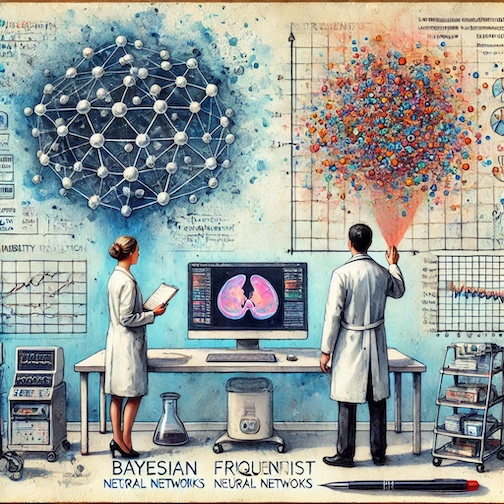

### Dataset: UCI Breast Cancer Wisconsin Dataset
We use the UCI Breast Cancer Wisconsin Dataset, a widely used dataset for benign vs. malignant tumor classification. The dataset consists of 30 features extracted from biopsy samples, describing characteristics such as tumor size, texture, and shape.

- **Number of Samples:** 569
- **Number of Features:** 30
- **Target Variable:** Malignant (1) or Benign (0)

### Project Plan
- Load & preprocess the UCI Breast Cancer Data.

- Train a Frequentist Neural Network (Baseline) for diagnosis.

- Train a Bayesian Neural Network (BNN) using PyMC to estimate uncertainty in predictions.

- Compare Performance & Uncertainty Estimation between the two models.

## **Modeling Approach**

### **1. Frequentist Neural Network (Baseline)**
A Frequentist Neural Network (FNN) is implemented using TensorFlow/Keras as a baseline model. This model assumes that all parameters (weights and biases) are fixed values learned through optimization.

**Model Structure:**
- Input layer with 30 features.
- Two hidden layers with ReLU activation.
- Batch Normalization and Dropout (0.2) to improve stability and prevent overfitting.
- Sigmoid activation in the output layer for binary classification.
- Loss Function: Binary Cross-Entropy (suitable for classification tasks).
- Optimizer: Adam Optimizer.

**Performance Metrics:**
- Accuracy → Measures overall correct predictions.
- Precision → Measures correctness in predicting malignant cases.
- Recall (Sensitivity) → Measures how well malignant cases are identified.
- F1 Score → Balances precision and recall for a comprehensive evaluation.

### **2. Bayesian Neural Network (BNN) with Variational Inference**
A Bayesian Neural Network (BNN) models uncertainty by treating weights and biases as probability distributions rather than fixed values. This approach allows us to quantify uncertainty in predictions, making it useful for medical AI applications.

**Key Differences from the Frequentist Model:**
- Weights and biases are assigned Normal priors with mean = 0 and standard deviation = 0.3.
- The network structure is similar but trained using VI rather than standard backpropagation.
- Likelihood Function: Bernoulli distribution (since the task is binary classification).
- Predictions are made by averaging posterior samples to account for uncertainty.

### **3. Model Training & Optimization**
- Frequentist NN is trained using TensorFlow/Keras for 20 epochs with a batch size of 128.
- Bayesian NN is trained using PyMC with VI to approximate the posterior.
- Posterior Sampling: 2,000 samples are drawn to make Bayesian predictions more stable.


In [ ]:
import numpy as np  # Import NumPy for numerical operations and handling arrays
import pandas as pd  # Import Pandas for handling structured data
import pymc as pm  # Import PyMC for Bayesian probabilistic modeling
import pytensor.tensor as pt  # Import PyTensor for tensor operations in probabilistic models
import tensorflow as tf  # Import TensorFlow for deep learning models
import matplotlib.pyplot as plt  # Import Matplotlib for creating visualizations

# Import necessary Keras components for building neural networks
from tensorflow.keras.models import Sequential  # Sequential model for building neural networks layer by layer
from tensorflow.keras.layers import Dense, Input, BatchNormalization, Dropout  # Layers for constructing the neural network

# Import Scikit-Learn utilities for data preprocessing and evaluation
from sklearn.model_selection import train_test_split  # Splits dataset into training and testing sets
from sklearn.preprocessing import StandardScaler  # Normalizes data for better neural network performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  # Evaluation metrics for classification tasks
from sklearn.datasets import load_breast_cancer  # Loads the breast cancer dataset

# -------------------------
# 1. Load & Preprocess Data (Breast Cancer Dataset)
# -------------------------
# Load the built-in breast cancer dataset from Scikit-Learn
data = load_breast_cancer()
X = data.data  # Extract feature variables (numerical attributes describing tumors)
y = data.target  # Extract target variable (1 = Malignant, 0 = Benign)

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features to improve model convergence and performance
scaler = StandardScaler()  # Initialize a StandardScaler to normalize features
X_train_scaled = scaler.fit_transform(X_train)  # Fit scaler to training data and transform it
X_test_scaled = scaler.transform(X_test)  # Transform test data using same scaling parameters

# Ensure input shape consistency for TensorFlow compatibility
X_test_scaled = np.array(X_test_scaled, dtype=np.float32)  # Convert test set to float32 for TensorFlow
X_test_scaled = np.reshape(X_test_scaled, (-1, X_test_scaled.shape[1]))  # Reshape input data to expected shape

# Convert input to NumPy before making predictions
X_test_scaled_np = np.array(X_test_scaled)  # Ensures the input is in NumPy format

# Enable XLA Compilation for TensorFlow (Accelerates model execution)
tf.config.optimizer.set_jit(True)

# -------------------------
# 2. Frequentist Neural Network (Optimized for Binary Classification)
# -------------------------
def build_frequentist_nn():
    """Defines a deep learning model using the Frequentist approach."""
    model = Sequential([
        Input(shape=(X_train_scaled.shape[1],)),  # Input layer matching feature dimensions
        Dense(16, activation='relu'),  # First hidden layer with 16 neurons and ReLU activation
        BatchNormalization(),  # Normalizes activations to improve training stability
        Dropout(0.2),  # Dropout layer (20% neurons deactivated to prevent overfitting)
        Dense(8, activation='relu'),  # Second hidden layer with 8 neurons and ReLU activation
        BatchNormalization(),  # Another batch normalization layer for stability
        Dropout(0.2),  # Dropout layer (20% neurons deactivated for regularization)
        Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
    ])
    # Compile the model with Adam optimizer and binary cross-entropy loss function
    model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train the Frequentist model
nn_model = build_frequentist_nn()
nn_model.fit(X_train_scaled, y_train, epochs=20, batch_size=128, verbose=0)  # Train model with 20 epochs and batch size of 128

# Corrected `predict()` function to output binary class labels
y_pred_frequentist_prob = nn_model.predict(X_test_scaled_np, verbose=0)  # Get probability predictions
y_pred_frequentist = (y_pred_frequentist_prob > 0.5).astype(int)  # Convert probabilities to binary labels (0 or 1)

# Performance Metrics
accuracy_frequentist = accuracy_score(y_test, y_pred_frequentist)  # Compute accuracy
precision_frequentist = precision_score(y_test, y_pred_frequentist)  # Compute precision
recall_frequentist = recall_score(y_test, y_pred_frequentist)  # Compute recall
f1_frequentist = f1_score(y_test, y_pred_frequentist)  # Compute F1-score

# Print results
print("\nFrequentist NN Results:")
print(f"Accuracy: {accuracy_frequentist:.4f}")
print(f"Precision: {precision_frequentist:.4f}")
print(f"Recall: {recall_frequentist:.4f}")
print(f"F1 Score: {f1_frequentist:.4f}")

# -------------------------
# 3. Bayesian Neural Network (Optimized with Variational Inference)
# -------------------------
with pm.Model() as bnn_model:  # Define a Bayesian neural network model using PyMC
    X_var = pm.Data("X", X_train_scaled)  # Define input data as a shared variable for Bayesian inference

    # **More Informative Priors (Tighter Distributions)**
    # Priors define initial beliefs about the parameters before observing data
    w1 = pm.Normal("w1", mu=0, sigma=0.3, shape=(X_train_scaled.shape[1], 10))  # First layer weights
    b1 = pm.Normal("b1", mu=0, sigma=0.3, shape=(10,))  # First layer biases
    w2 = pm.Normal("w2", mu=0, sigma=0.3, shape=(10, 5))  # Second layer weights
    b2 = pm.Normal("b2", mu=0, sigma=0.3, shape=(5,))  # Second layer biases
    w3 = pm.Normal("w3", mu=0, sigma=0.3, shape=(5, 1))  # Output layer weights
    b3 = pm.Normal("b3", mu=0, sigma=0.3)  # Output layer bias

    # **ReLU Activation for Stability**
    hidden1 = pm.math.maximum(pm.math.dot(X_var, w1) + b1, 0)  # First hidden layer with ReLU activation
    hidden2 = pm.math.maximum(pm.math.dot(hidden1, w2) + b2, 0)  # Second hidden layer with ReLU activation
    output = pm.math.sigmoid(pm.math.dot(hidden2, w3) + b3)  # Sigmoid activation for binary classification
    output = pt.flatten(output)  # Ensures shape is (n_samples,)

    # **Likelihood: Use Bernoulli Distribution for Binary Classification**
    y_obs = pm.Bernoulli("y_obs", p=output, observed=pm.Data("y", y_train))

    # **Variational Inference Training**
    approx = pm.fit(n=5_000, method="advi", obj_optimizer=pm.adagrad_window(learning_rate=0.01))  # Train with ADVI
    trace = approx.sample(2_000)  # Draw 2,000 samples for posterior approximation

# -------------------------
# 4. Bayesian Predictions on Test Data
# -------------------------
with bnn_model:
    pm.set_data({"X": X_test_scaled, "y": y_test})  # Update the dataset for prediction
    post_pred = pm.sample_posterior_predictive(trace, var_names=["y_obs"], progressbar=False)  # Posterior sampling

# Extract posterior predictions (mean over posterior samples)
y_pred_bayesian_samples = post_pred.posterior_predictive["y_obs"]
y_pred_bayesian_prob = y_pred_bayesian_samples.mean(dim=["chain", "draw"]).values.squeeze()
y_pred_bayesian = (y_pred_bayesian_prob > 0.5).astype(int)  # Convert probabilities to class labels

# Compute Performance Metrics
accuracy_bayesian = accuracy_score(y_test, y_pred_bayesian)
print("\nFinal Bayesian NN Results (Optimized VI with More Stability & Faster Training):")
print(f"Accuracy: {accuracy_bayesian:.4f}")
print(f"Precision: {precision_score(y_test, y_pred_bayesian):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_bayesian):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_bayesian):.4f}")

# ---------------------------------
# 5. Compare Predictions & Uncertainty
# ---------------------------------
results_df = pd.DataFrame({
    "Method": ["Frequentist NN", "Bayesian Neural Network"],
    "Accuracy": [accuracy_frequentist, accuracy_bayesian]
})
print("\nFrequentist vs Bayesian NN Comparison:")
print(results_df)

# ---------------------------------
# 6. Scatter Plot of Predictions
# ---------------------------------
# Add jitter to y_test for better visualization
jitter_strength = 0.03  # Slightly increased jitter
jitter = np.random.normal(0, jitter_strength, size=len(y_test))
y_test_jittered = y_test + jitter  # Apply jitter to separate points visually

# Compute Bayesian uncertainty (clip values between 0 and 1)
y_pred_bayesian_std = y_pred_bayesian_samples.std(dim=["chain", "draw"]).values.squeeze()
y_pred_bayesian_prob = np.clip(y_pred_bayesian_prob, 0, 1)  # Clip probabilities
y_pred_bayesian_std = np.clip(y_pred_bayesian_std, 0, 0.3)  # Limit uncertainty bars

plt.figure(figsize=(8, 6))
# Scatter plot for Frequentist NN predictions
plt.scatter(y_test_jittered, y_pred_frequentist_prob, label="Frequentist NN", alpha=0.7, color="blue")
# Scatter plot for Bayesian NN predictions with uncertainty bars
plt.errorbar(y_test_jittered, y_pred_bayesian_prob, yerr=y_pred_bayesian_std, fmt='o',
             color="red", alpha=0.6, label="Bayesian NN ± Uncertainty", capsize=3, elinewidth=1)

# Labels & Titles
plt.xlabel("True Diagnosis (0 = Benign, 1 = Malignant)")
plt.ylabel("Predicted Probability")
plt.title("Comparison: Frequentist vs Bayesian Neural Network for Medical Diagnosis")
plt.legend()
plt.ylim(-0.05, 1.05)  # Ensure probabilities remain within range
plt.show()


### Visualizing Predictions & Uncertainty
To illustrate model differences, we generated a scatter plot comparing predictions from both models:

- **Frequentist Predictions:** Provide direct point estimates.
- **Bayesian Predictions:** Reflect uncertainty by averaging multiple posterior samples.

**Interpretation:** If a Bayesian model predicts a probability close to 0.5, it suggests higher uncertainty, meaning further medical testing might be necessary before making a diagnosis.

📝 **Recommendation: Use a Violin Plot**

The previous plot displays individual predicted probabilities with uncertainty bars, but it appears cluttered and difficult to interpret due to overlapping points. A violin plot provides a more intuitive visualization by illustrating the distribution and density of predictions for each class. This makes it easier to compare the confidence levels of Frequentist vs. Bayesian predictions while maintaining a cleaner, more interpretable visual representation.

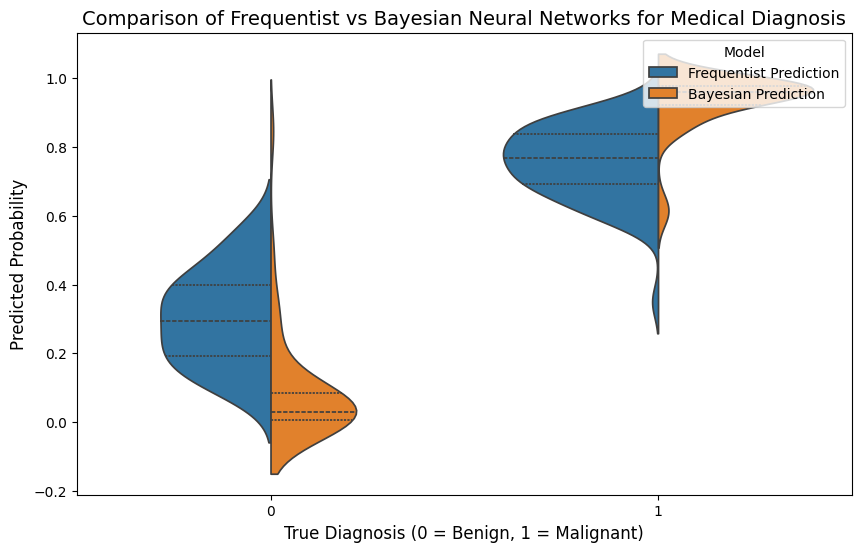

In [ ]:
import seaborn as sns

# Create a DataFrame for visualization
viz_df = pd.DataFrame({
    "True Label": y_test,
    "Frequentist Prediction": y_pred_frequentist_prob.flatten(),
    "Bayesian Prediction": y_pred_bayesian_prob.flatten()
})

# Melt the dataframe to long format for Seaborn
viz_df_melted = viz_df.melt(id_vars=["True Label"], var_name="Model", value_name="Predicted Probability")

# Create a violin plot to show prediction distribution
plt.figure(figsize=(10, 6))
sns.violinplot(x="True Label", y="Predicted Probability", hue="Model", data=viz_df_melted, split=True, inner="quartile")

# Titles and labels
plt.title("Comparison of Frequentist vs Bayesian Neural Networks for Medical Diagnosis", fontsize=14)
plt.xlabel("True Diagnosis (0 = Benign, 1 = Malignant)", fontsize=12)
plt.ylabel("Predicted Probability", fontsize=12)
plt.legend(title="Model", loc="upper right")

# Show the plot
plt.show()

The violin plot compares the prediction distributions of Frequentist and Bayesian neural networks for medical diagnosis. For benign cases (0), the Bayesian model is more confident, clustering predictions near zero, whereas the Frequentist model exhibits a wider spread, sometimes assigning moderate probabilities. For malignant cases (1), both models predict high probabilities close to one, but the Bayesian model shows a more concentrated distribution, indicating greater certainty. Overall, the Bayesian model appears to be better calibrated, particularly in avoiding false positives for benign cases, while both models effectively identify malignancies.

### Limitations of Bayesian Neural Networks (BNNs)
Despite their advantages, BNNs have major drawbacks that lead us to explore Deep Learning (DL):

| **Limitation** | **Why It's a Problem?** |
|---------------|----------------------|
| **Computational Cost** | BNNs require MCMC sampling or VI, which is slow and scales poorly. |
| **Not Scalable for Big Data** | With millions of data points (e.g., images, text), Bayesian methods become infeasible. |
| **Hard to Train** | Requires expertise in probability, Bayesian inference, and MCMC tuning. |
| **Not Ideal for High-Dimensional Data** | In tasks like computer vision and NLP, BNNs struggle due to complexity in posterior estimation. |







### Why Move to Artificial Neural Networks (ANNs) and Deep Learning (DL)?

Deep Learning (ANNs, CNNs, RNNs, Transformers) overcomes these issues!

Deep Learning (DL) methods are more scalable, faster to train, and achieve state-of-the-art performance in real-world tasks.

🔹 **ANNs (Artificial Neural Networks)**
   - Inspired by the brain, they learn feature representations.
   - Used in regression & classification (e.g., predicting house prices, diagnosing diseases).

🔹 **Deep Learning (DL) Models**
   - Scales to massive datasets (millions of images, texts, and videos).
   - Convolutional Neural Networks (CNNs) → Super effective for image processing (e.g., detecting cancer in medical images 🏥).
   - Recurrent Neural Networks (RNNs) → Used in time-series forecasting & NLP (e.g., predicting patient deterioration 📊).
   - Transformers (BERT, GPT, ChatGPT 😉) → Revolutionized Natural Language Processing (NLP).


### When to Use Bayesian vs. Deep Learning?

| **Scenario** | **Use Bayesian ML** | **Use Deep Learning** |
|-------------|-----------------|-----------------|
| **Small dataset (<1000 samples)** | ✅ | ❌ |
| **Uncertainty estimation needed (e.g., medical, finance)** | ✅ | ❌ |
| **Big Data (millions of samples)** | ❌ | ✅ |
| **Complex patterns (images, speech, NLP)** | ❌ | ✅ |
| **Fast inference needed (real-time applications)** | ❌ | ✅ |



### Deep Learning is the Future!

Bayesian methods are great when data is small & uncertainty is important. Deep Learning is powerful for large-scale AI applications!




## Beyond Bayesian ML: Smarter Alternatives for Small Data & Uncertainty

BNNs shine when data is scarce or uncertainty is crucial—but that doesn’t mean ANNs can’t handle these cases! Let’s explore faster, more scalable solutions that achieve the same goals without Bayesian overhead.

### Small Datasets (<1000 Samples)? No Problem!  

Limited data? No need for slow Bayesian inference. Smarter techniques generalize better and train faster!

👉 Better Choices Than Bayesian ML:

| **Method** | **Why It’s Better?** |
|-----------|----------------------|
| **Regularized Models (Ridge/Lasso)** | Prevents overfitting with L1/L2 penalties. |
| **Support Vector Machines (SVMs)** | Works well with small, high-dimensional data. |
| **Random Forests / XGBoost** | Tree-based methods generalize effectively. |
| **Few-Shot Learning (FSL)** | Leverages pre-trained models to learn from minimal data. |

🔹 Why Not Bayesian?

- Slow & Computationally Expensive
- Scaling Issues → Bayesian models struggle with high-dimensional feature spaces.


### Need Uncertainty Estimation? Skip the Bayes Trap!

BNNs aren’t the only way to quantify uncertainty! Faster, non-Bayesian methods do it better.

👉 Practical, Scalable Uncertainty Estimation Methods:

| **Method** | **Why It’s Better?** |
|-----------|----------------------|
| **MC Dropout** | Uses dropout during inference for uncertainty. |
| **Deep Ensembles** | Trains multiple NNs & averages predictions for confidence estimation. |
| **Quantile Regression** | Predicts uncertainty bounds instead of single outputs. |
| **Conformal Prediction** | Produces reliable confidence sets around predictions. |

🔹 Why Not Bayesian?

- MC Dropout + Deep Ensembles ≈ Same uncertainty estimation, but WAY faster.  
- Better Scalability → Works efficiently on real-world ML problems.


### Key Takeaways: When to Use What?

| **Scenario** | **Best Choice** | **Why?** |
|-------------|---------------|----------|
| **Small Data (<1000 samples)** | **SVM, XGBoost, Ridge Regression** | Simpler, faster, avoids overfitting. |
| **Uncertainty Estimation** | **MC Dropout, Deep Ensembles** | Matches Bayesian accuracy, but trains in minutes, not days. |
| **Big Data + Complex Tasks** | **Deep Learning (CNNs, Transformers)** | Scales efficiently to real-world AI. |


### Do We Even Need Bayesian Priors? Not Always!
Uncertainty isn’t just about probability—it’s about domain knowledge 📚. In medical AI, clinical expertise, human annotations, and decision rules can replace Bayesian priors more effectively.

### When & How to Use Prior Knowledge Instead of Bayesian ML?

| **Scenario** | **Alternative to Bayesian Priors** |
|-------------|--------------------------------|
| **Rare Diseases (Few Cases)** | Use **Few-Shot Learning, Transfer Learning** with expert-driven features. |
| **Medical Imaging (X-rays, MRI)** | Train on large public datasets (**CheXpert, NIH**) before fine-tuning. |
| **Uncertain Diagnoses** | **Deep Ensembles + Human-in-the-Loop AI** for doctor validation. |
| **Risk Prediction Models** | Incorporate clinical scoring systems (**SOFA, APACHE-II**). |



### Conclusion: Bayesian Isn’t Always the Answer!

Instead of waiting hours for MCMC to finish, why not use faster, scalable, real-world solutions?

- **Small data?** → Use SVM, XGBoost, Regularization.  
- **Need uncertainty?** → Use MC Dropout, Deep Ensembles.  
- **Need priors?** → Use domain knowledge + hybrid ML.  
- **Large-scale AI?** → Just go Deep Learning and move on!  




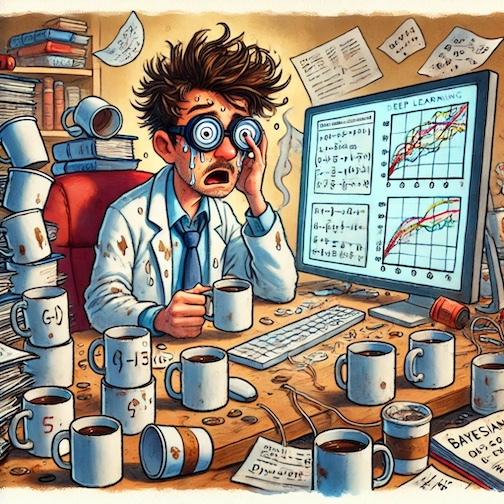

## MCMC Believers in 2025: The Four Theories of the Bayesian Resistance

1️⃣ The Aristocrat Theory 👑 – You’ve never actually run MCMC yourself. You have a small army of grad students and engineers grinding through the computations for you, while you sit back and sip coffee, dropping the word "inference" in funding proposals.

2️⃣ The Zen Master Theory 🧘‍♂️ – You are the most patient person alive. While the rest of the world rushes to deploy their AI models, you’re just watching your Markov Chain Monte Carlo crawl to convergence, perfectly at peace with the 5-day runtime.

3️⃣ The Closet Frequentist Theory 🤫 – You are secretly running Frequentist models and not telling anyone. Oh sure, you talk about priors and uncertainty, but when deadlines hit, you silently reach for an Adam optimizer and get on with your life. We see you. We forgive you.

4️⃣ The Quantum Cultist Theory 🔮 – You either own a quantum computer or you just enjoy suffering. Because let’s be honest—this thing is taking longer than the peer review process. If you’re really waiting for MCMC to finish training your Bayesian Neural Network, you might actually finish your PhD first.

## Wrapping Up Traditional Machine Learning – Time to Move On!

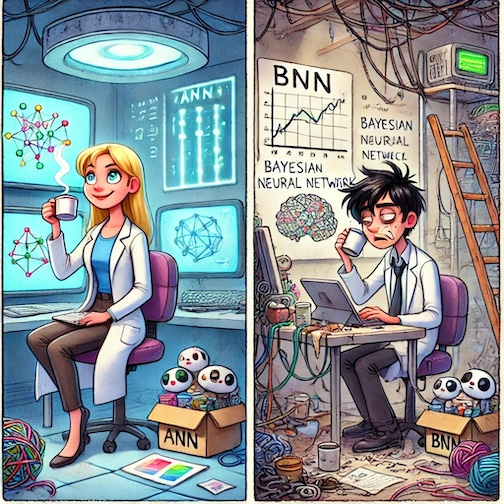

So, we’ve explored the classic world of Machine Learning—from linear models, decision trees, and ensemble methods to the mystical realm of Bayesian inference, where math gets so intense that even statisticians start questioning their life choices.

We saw how Frequentist ML gives us point estimates, while Bayesian ML tries to sound smarter by adding probability distributions everywhere. We even dabbled in Bayesian Neural Networks (BNNs), which are great for small datasets and uncertainty estimation—until you realize they take forever to train and still struggle with big data.

But let’s be honest… I, the professor of this course, have a shameless bias toward Artificial Neural Networks (ANNs). Why? Because why settle for handcrafted features, overcomplicated statistical assumptions, and models that break when you add more data—when you can have ANNs that learn everything themselves?

So, enough with all this “traditional ML” nostalgia. It’s time to embrace the real magic—where we stack layers, throw in some backpropagation, and let GPUs do the thinking for us.

Welcome to the world of Artificial Neural Networks and Deep Learning—where the models are deep, the hype is real, and the only thing we optimize better than loss functions is our caffeine intake.